# North Carolina Public Schools Education Data 
## Project Lab 3: Cheng, Edwards, Herford, Rezsonya

## Introduction
In our first project, we explored the North Carolina Public High Schools Dataset by applying logistic regression and support vector machines techniques to classify college enrollment percentages. We then implemented classifiers (KNN, Logistic Regression, Random Forest) as well as regression models (Linear Regression, Ridge Regression, MLP Regressor). 

For this project, we will perform clustering on our data as a preprocessing step to extract different features. We will use those features to build a classifier and analyze its performance in terms of accuracy and speed as compared to a classifier modeled without clustering as a preprocessing step.  

The question of interest we will use the classification models to answer is to predict if a school might have a college enrollment percentage greater than 50%. 

What follows is the combined work of Lu Cheng, Phil Edwards, Scott Herford, and Nuoya Rezsonya. 

# Business Understanding 1 [10 points] 
**Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?**

Leveraging historical, secondary data collected from high schools in the state of North Carolina, the purpose of the following study is to investigate what factors influence whether or not a student enrolls in a post-secondary institution to further their education. Lastly, we utilize the following data in order to predict 2018 outcomes, such as college enrollment, SAT scores, and graduation rates. Originally collected from the North Carolina Public Schools Report Card and Statistical Profiles Databases, high school data from 2014-2017 contains statistics on student and school performance as well as other factors, such as academic growth, diversity, school safety, educator experience, school funding, and educational attainment.

Specifically, we will use data specific to educational attainment, which can be found in The Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools. Using statistical modeling, data mining techniques, and machine learning algorithms, we aspire to narrow our focus as to what are the most important factors that explain a student’s choice to enroll in college as well as predict outcomes related to educational attainment of high school students. With appropriate use of the techniques listed above, we would find a good prediction algorithm to achieve between 85-100% accuracy in producing output that explains achievement of high school students in the state of North Carolina. The value obtained from the following analysis will benefit the following areas of study: public policy, secondary education, higher education, immigration, racial inequality, economic policy, social stratification, diversity, and many more.

With the rising cost of education in the United States, we can see a climate where government budgets continue to shrink, the demand for hiring more educators continues to increase, and student outcomes fail to satisfy government officials as well as the public when so much economic capital is being filtered into the education system. Furthermore, we continue to observe the output of loads of research that points to our education system failing to provide the necessary environments for cultivating and eliminating much of the existing barriers that hinder student opportunities and upward mobility. This particularly pertains to programs designed to assist students in learning development and promoting more students to apply and enroll in post-secondary education. Foote, Schulkind, and Shapiro (2015) note a large portion of research exists that helps “understand the barriers of college entry, especially for low-income students.” These barriers can be classified into three categories: achievement barriers, financial barriers, and information/administrative barriers (Foote et. al, 2015).

For decades, academia as well as educational research firms have produced data on what educational inputs affect achievement in education, and much research has been focused on the financial component to higher education. With regard to the information barrier, according to Hoxby and Turner (2013), in order to increase applications from students to more colleges and colleges of higher-quality, school administrations/systems should provide “high-ability, low-income students with personalized information about the application process and college costs.” Increasing counseling and mentoring to students throughout the application process increases college enrollment as found by Avery (2010) and Carrell and Sacerdote (2013). Through experimental research, Oreopoulos and Dunn (2012) added that showing high school students a short video that discusses the benefits of higher education changed their beliefs about expected ROIs. Thus, it is our goal to reproduce some of the same outputs currently in existence which explain trends related to educational attainment and shed some light on what may be the most important factors in explaining whether or not students enroll in post-secondary education using the methods explained above.

References:
Avery, C. (2010). The effects of college counseling on high-achieving, low-income students (NBER Working Paper 16359).

Carrell, S., & Sacerdote, B. (2013). Late interventions matter too: The case of college coaching New Hampshire (NBER Working Paper 19031).

Foote, A., Schulkind, L., & Shapiro, T. (2015). Missed signals: The effect of ACT college-readiness measures on post-secondary decisions. Economics of Education Review, 46, 39.

Hoxby, C.M., & Turner (2013). Expanding college opportunities for high-achieving, low income students (SIEPR Discussion Paper 12-014).

Oreopoulos,P., & Dunn, R. (2012). Information and college access: Evidence from a randomized field experiment (NBER Working Paper 18551).

**How will you measure the effectiveness of a good algorithm?**

*NOTE: We refer to class bias, which is discovered later in the document. We have included the metrics explanation here as our interpretation of the syllabus requires this to be a part of business understanding.*

Since we are applying them to a classifier, the four clustering models in this notebook will be cross validated using F-score to determine optimal parameterization, and the pipeline outputs will also include accuracy, precision, and recall for each of the folds for visual inspection. 

We will also include the silhouette score rankings as a part of each output for completeness, but will rank best model based on classifier F1 scoring. 

The Silhouette Coefficient is defined for each sample and is composed of two scores:
 - a: The mean distance between a sample and all other points in the same class.
 - b: The mean distance between a sample and all other points in the next nearest cluster.
 - REFERENCE: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score


We will code the pipeline to use F1 score as the deciding metric due to our response variable **binary_ENROLL_sch_pct** having uneven class distribution. The ratio between value 1 and 0 is about 3:1. Unlike *accuracy*, both *precision* and *recall* focus on the performance of positives rather than negatives. They work well if there’s an uneven class distribution. *F1 score* is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. As an evaluation measure, F1 Score will be more appropriate than accuracy in this case. Therefore, we will use F1 Score for classification models.

Once all the top performing model parameterizations are selected, we will look at all these metrics again and add to them the confusion matrices, area under ROC curve, and misclassification error rate for the test holdout set (see train/test splits section below for details on our multistage validation testing methodology).  

The table below shows the metric and then provides insight/description as to why we selected these as measures to analyze the data. 

|  Metric Names  |Description
|     :-     |     -------------:     |     -------------:     |:-: 
| **Accuracy** (ACC)| Accuracy is the fraction of predictions our model got right. Accuracy alone doesn't tell the full story when you're working with a class-imbalanced data set, like this one, where there is a significant disparity between the number of positive and negative labels. Accuracy cannot be the only evaluation metric to rely on since it does not consider the cost of misclassification. 
| **Error Rate** (ERR)|Misclassification Rate: Overall, how often is it wrong? 
| **Precision** or positive predictive value (PPV)|When it predicts yes, how often is it correct? Precision is independent of accuracy. You can be very precise but inaccurate. Precision and recall counter each other. Increasing one of them reduces the other. We chose accuracy as our ranking parameterization optimization, but this is something we wanted to also look at and would use it as the ranking metric if we were trying to avoid false positives (such as equipment failure predictions). 
| **Recall**, sensitivity, hit rate, or true positive rate (TPR)| This metric is to answer the question: What proportion of positive identifications was actually correct?Sensitivity is the percentage of actual 1’s that were correctly predicted. Sensitivity matters more when classifying the 1’s correctly is more important than classifying the 0’s. We chose accuracy as our ranking parameterization optimization, but this is something we wanted to also look at and would use it as the ranking metric if we were trying to avoid false negatives (such as preventative medical condition predictions). 
| **F1 score** | It is the harmonic mean of precision and recall. F1-score will be our metric to determine optimal parameterization in the pipeline.|
| **Confusion Matrix** | Matrix of the counts of true positives, true negatives, false positives, and false negatives. Very useful to quickly see how the model is performing.  
| **Area Under Receiver Operating Characteristic Curve**, AUROC | This is a useful visualization where each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. In our case it is a binary decision, but to view as a curve we would not use a 1 or a 0, but instead apply a probability between the two and then sort for appearance purpose. 

Although we are only listing 4 of these for parameterization, below is a recap of the classification metrics available based on the calculations of the number of True Negatives, True Positives, False Negatives, and False Positives. 

|     Term    |      Formula     |  Description
|     :-     |     -------------:     |     :-: 
|TN| conf[0,0]|True Negative
|TP| conf[1,1]|True Positive
|FN| conf[1,0]|False Negative
|FP| conf[0,1]|False Positive
|TPR| TP/(TP+FN)  | sensitivity, recall, hit rate, or true positive rate (TPR)
|TNR| TN/(TN+FP)  | specificity or true negative rate (TNR)
|PPV| TP/(TP+FP)  | precision or positive predictive value (PPV)
|NPV| TN/(TN+FN)  | negative predictive value (NPV)
|FNR| FN/(FN+FP)  | miss rate or false negative rate (FNR)
|FPR| FP/(FP+TN)  | fall-out or false positive rate (FPR)
|FDR| FP/(FP+TP)  | false discovery rate (FDR)
|FOR| FN/(FN+TN)  | false omission rate (FOR)
|ACC| (TP+TN)/(TP+TN+FP+FN)  | Accuracy (ACC)
|ERR| (FP+FN)/(TP+TN+FP+FN)  | Error Rate (ERR)
|F1| (2*TP)/((2*TP)+FP+FN)  | F1 score is the harmonic mean of precision and recall. 

Reference:http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

**Code block below generates classficiation scorer based on accuracy, precision, recall, and F1 score.**

In [1]:
# Classification Scorer
# REFERENCE: http://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/tree/master/
#Use accuracy, precision, recall, F-measure to score the classification models created 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score

#Create scorers
accuracy_scorer = make_scorer(score_func=accuracy_score, greater_is_better=True)
precision_scorer = make_scorer(score_func=precision_score, greater_is_better=True)
recall_scorer = make_scorer(score_func=recall_score, greater_is_better=True)
f1_scorer = make_scorer(score_func=f1_score, greater_is_better=True)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
class_errorScoring = {'accuracy':  accuracy_scorer, 
                'precision': precision_scorer,
                'recall': recall_scorer,
                'f1': f1_scorer
               } 

**Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?**

 - Due to the class imbalance in our classification target variable (which will be shown in upcoming section), we have chosen to include stratification to ensure class bias does not worsen during cross validation. 
 - We will then apply 10-fold cross validation splits of 85/15 percent to train and tune our models. 10-fold CV with shuffle split is to avoid overfitting.

In [2]:
#  Classification Splits

# Create 10-fold stratified cv splits
from sklearn.model_selection import StratifiedShuffleSplit
class_cv = StratifiedShuffleSplit(n_splits=10, test_size=0.15, random_state=7331)

# Data Understanding 1 [10 points]
**Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?**

The original raw data are collected from http://www.ncpublicschools.org/. The final processed data, which this project will use, is a combination of years 2014-2017 North Carolina public high school machine learning data sets which are the final data sets in Dr. Jake Drew's preprocessing pipeline code at https://github.com/jakemdrew/EducationDataNC. The following code blocks will inner concatenate (by school code/unit code) all high school machine learning data sets for 4 different years. The result will be a final numeric data set of 1904 rows and 288 attributes. An attributes description table has also been created to help one understanding the data and can be found following the data type and statistics descriptions below. Since these data have been pre-processed already, the issues of missing values, duplicate data, etc. has already been addressed. We will briefly verify this in the code blocks below.  

First, we will initialize the data frames by reading the 2014-2017 .csv files from our data directory.

In [3]:
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC
# Alteration from reference code include removal of schoolYear as these will be fixed years in the following section. 

#import some standard Libraries
import pandas as pd
from pandas.tools.plotting import boxplot
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pprint
%matplotlib inline

# scikit learn package importation

#**********************************************************************************
# Set the following variables before running this code!!!
#**********************************************************************************

#Location where copies of the raw data files will be downloaded and saved as csv files.
# directory = 'C:/Conda/STUDY/data_mining/term_project/HighML/'
#directory = 'C:/Users/flip/Desktop/SMU/MSDS7331/data/HighML/'
# directory = 'C:/Users/v803478/Desktop/SMU/MSDS 7331/'
# directory = 'C:/python_Files/MSDS7331_DataMining/Project/data/'

#### Reference: Snippets of this code block was taken directly from Eric Larson git repository: https://github.com/eclarson ####
#### Reference: https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas

df_2014ML = pd.read_csv('PublicHighSchools2014_ML.csv') # read in the csv file
df_2014ML['year'] = 2014
# Correct a minor issue with column naming matches between years (reference Dr. Drew advice)
df_2014ML.rename(columns={'All_All Student (Total or subtotal)_ENROLL_sch_pct': 'ALL_All Students (Total or Subtotal_ENROLL_sch_pct'}, inplace=True)
# print('*********************************Before: 2014 Public High School Data*********************************')
# df_2014ML.info(verbose=False)

df_2015ML = pd.read_csv('PublicHighSchools2015_ML.csv') # read in the csv file 
df_2015ML['year'] = 2015
# print('*********************************Before: 2015 Public High School Data*********************************')
# df_2015ML.info(verbose=False)

df_2016ML = pd.read_csv('PublicHighSchools2016_ML.csv') # read in the csv file 
df_2016ML['year'] = 2016
# print('*********************************Before: 2016 Public High School Data*********************************')
# df_2016ML.info(verbose=False)

df_2017ML = pd.read_csv('PublicHighSchools2017_ML.csv') # read in the csv file 
df_2017ML['year'] = 2017
# print('*********************************Before: 2017 Public High School Data*********************************')
# df_2017ML.info(verbose=False)

#Combine data
#### Reference https://pandas.pydata.org/pandas-docs/stable/merging.html
df_final = pd.concat([df_2014ML,df_2015ML,df_2016ML,df_2017ML], axis=0, join='inner', ignore_index=True)

## A little more naming convention cleanup of easier usage in the following code blocks
df_final.rename(columns={'ALL_All Students (Total or Subtotal_ENROLL_sch_pct': 'All_Students_ENROLL_sch_pct'}, inplace=True)

#print('*********************************After: Combined Public High School Data*********************************')
#print('*********************************Verbose=True to show all column names and type of data********************')
#df_final.info(verbose=True)

# Write to local as csv format. Commented out for now, but here as a placeholder for us to use sometimes. 
#df_final.to_csv(directory + 'df_final.csv', sep=',', index=False)

print("Highschool Dataset Prepared")

Highschool Dataset Prepared


The following is a statistic description of the dataset.

In [4]:
pd.set_option('display.max_rows', 300)
df_final.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
student_num,1904.0,849.853466,588.307262,8.000000,326.500000,783.500000,1221.250000,2966.000000
lea_avg_student_num,1904.0,830.111870,357.643945,105.000000,584.500000,810.000000,974.000000,1852.000000
st_avg_student_num,1904.0,828.354517,105.106371,252.000000,837.000000,848.000000,853.000000,860.000000
Biology_Size,1904.0,18.629727,5.607309,0.000000,16.000000,19.000000,23.000000,32.000000
English II_Size,1904.0,19.313550,5.510312,0.000000,17.000000,20.000000,23.000000,35.000000
Math I_Size,1904.0,18.243172,5.544849,0.000000,16.000000,19.000000,22.000000,37.000000
lea_total_expense_num,1904.0,9093.345021,1204.493613,7282.190000,8362.900000,8820.080000,9405.800000,17801.850000
lea_salary_expense_pct,1904.0,0.670409,0.095046,0.547000,0.611000,0.626000,0.655000,0.878000
lea_services_expense_pct,1904.0,0.081126,0.016536,0.047000,0.069000,0.080500,0.089000,0.153000
lea_supplies_expense_pct,1904.0,0.081555,0.015932,0.028000,0.071000,0.081000,0.091000,0.143000


Data dictionary showing description for each variable.


|     Column Name     |      Description     |     From     
|     :-     |     -------------:     |     :-:     
|     student_num     |Number of students at school level (school size)	|Profile
|     lea_avg_student_num     |Average school size within the LEA|Profile
|     st_avg_student_num     |Average school size within the State|Profile
|Biology_Size     |	Average class/course size for school/distric/state|Profile-matrix, at school level
|     English II_Size     |	Average class/course size for school/distric/state|Profile-matrix, at school level
|     Math I_Size     |	Average class/course size for school/distric/state|Profile-matrix, at school level
|     lea_total_expense_num     | Total expense (Dollars Spent) at LEA level|Funding:federal/local/state expenses on different categories
|     lea_salary_expense_pct     |Percent of expense spent on Salaries at LEA level|Funding:federal/local/state expenses on different categories
|     lea_services_expense_pct     |Percent of expense spent on Services at LEA level|Funding:federal/local/state expenses on different categories
|     lea_supplies_expense_pct     |Percent of expense spent on Supplies at LEA level|Funding:federal/local/state expenses on different categories
|     lea_instruct_equip_exp_pct     |Percent of expense spent on Instructional Equipment at LEA level|Funding:federal/local/state expenses on different categories
|     lea_federal_perpupil_num     |Federal expense per pupil at LEA level|Funding:federal/local/state expenses on different categories
|     lea_local_perpupil_num     |Local expense per pupil at LEA level|Funding:federal/local/state expenses on different categories
|     lea_state_perpupil_num     |State expense per pupil at LEA level|Funding:federal/local/state expenses on different categories
|     SPG Score     |school performace grades(numeric)|SPG table
|     EVAAS Growth Score     |EVVAS: provide a score to evaluate the education effectiveness|SPG table
|     English II Score     |average score, biggest 100|SPG table
|     Biology Score     |	average score, biggest 100|SPG table
|     ACT WorkKeys Score     |average score, biggest 100|SPG table
|     ACTMath_ACTBenchmark_All     |	ACT math benchmarks for all	|SPG table
|     ACTScience_ACTBenchmark_All     |	ACT science benchmarks for all	|SPG table
|     ACTWriting_ACTBenchmark_All     |	ACT writing benchmarks for all	|SPG table
|     EOCSubjects_CACR_All     |EOC Subjects- College and Career Ready for all|SPG table
|     GraduationRate_5yr_All     |	GraduationRate 5 years for all	|Accountability Drill Down (Female)
|     ACTCompositeScore_UNCMin_Female     |	ACT composite score for UNC minimum females	|Accountability Drill Down (Female)
|     ACTEnglish_ACTBenchmark_Female     |	ACT English benchmark females|Accountability Drill Down (Female)
|     ACTWorkKeys_SilverPlus_Female     |	Silver or Better Certificate female	|Accountability Drill Down (Female)
|     EOCEnglish2_CACR_Female     |	EOC english 2 - College and Career Ready female|	Accountability Drill Down (Female)
|     GraduationRate_4yr_Female     |	GraduationRate 4 years for female	|Accountability Drill Down (Female)
|     GraduationRate_5yr_Female     |	GraduationRate 5 years for female	|Accountability Drill Down (Female)
|     ACTMath_ACTBenchmark_Male     |	ACT math benchmarks for males	|Accountability Drill Down (Male)
|     ACTScience_ACTBenchmark_Male     |	ACT science benchmarks for males	|Accountability Drill Down (Male)
|     ACTWorkKeys_SilverPlus_Male     |	Silver or Better Certificate males	|Accountability Drill Down (Male)
|     ACTWriting_ACTBenchmark_Male     |	ACT writing benchmarks for males	|Accountability Drill Down (Male)
|     EOCBiology_CACR_Male     |	EOC biology- College and Career Ready male	|Accountability Drill Down (Male)
|     EOCEnglish2_CACR_Male     |	EOC english 2- College and Career Ready male	|Accountability Drill Down (Male)
|     GraduationRate_4yr_Male     |	GraduationRate 4 years for male	|Accountability Drill Down (Male)
|     GraduationRate_5yr_Male     |	GraduationRate 5 years for male	|Accountability Drill Down (Male)
|     ACTCompositeScore_UNCMin_AmericanIndian     |	ACT Composite Score, Met UNC Minimum|Accountability Drill Down American Indian
|     ACTMath_ACTBenchmark_AmericanIndian     |	ACT Math Benchmark	|Accountability Drill Down American Indian
|     ACTSubtests_BenchmarksMet_AmericanIndian     |ACT subtests Percent of Benchmarks Met|Accountability Drill Down American Indian
|     ACTWorkKeys_SilverPlus_AmericanIndian     |ACT Work Keys Silver Pass(skills assessment test)|Accountability Drill Down American Indian
|     ACTWriting_ACTBenchmark_AmericanIndian     |	ACT Writing Benchmark|Accountability Drill Down American Indian
|     EOCBiology_CACR_AmericanIndian     |	Educational Opportunity Center, College and Career Ready, Biology|Accountability Drill Down American Indian
|     EOCEnglish2_CACR_AmericanIndian     |	Educational Opportunity Center, College and Career Ready,English|Accountability Drill Down American Indian
|     EOCMathI_CACR_AmericanIndian     |	Educational Opportunity Center, College and Career Ready,Math1|Accountability Drill Down American Indian
|     EOCSubjects_CACR_AmericanIndian     |	Educational Opportunity Center, College and Career Ready,Subjects|Accountability Drill Down American Indian
|     GraduationRate_4yr_AmericanIndian     |	graduation rate of 4 years|Accountability Drill Down American Indian
|     GraduationRate_5yr_AmericanIndian     |	graduation rate of 5 years|Accountability Drill Down American Indian
|     ACTCompositeScore_UNCMin_Asian     |	 	|Accountability Drill Down Asian
|     ACTSubtests_BenchmarksMet_Asian     |	ACT subtests Percent of Benchmarks Met|Accountability Drill Down Asian
|     ACTWorkKeys_SilverPlus_Asian     | 	|Accountability Drill Down Asian
|     EOCBiology_CACR_Asian     |	 	|Accountability Drill Down Asian
|     EOCEnglish2_CACR_Asian     |	 	|Accountability Drill Down Asian
|     EOCMathI_CACR_Asian     |	 	|Accountability Drill Down Asian
|     EOCSubjects_CACR_Asian     |	 	|Accountability Drill Down Asian
|     GraduationRate_4yr_Asian     |	 	|Accountability Drill Down Asian
|     GraduationRate_5yr_Asian     |	 	|Accountability Drill Down Asian
|     ACTCompositeScore_UNCMin_Black     |	 	|Accountability Drill Down Black
|     ACTEnglish_ACTBenchmark_Black     |	 	|Accountability Drill Down Black
|     ACTMath_ACTBenchmark_Black     |	 	|Accountability Drill Down Black
|     ACTReading_ACTBenchmark_Black     |	 	|Accountability Drill Down Black
|     ACTScience_ACTBenchmark_Black     |	 	|Accountability Drill Down Black
|     ACTSubtests_BenchmarksMet_Black     |	ACT subtests Percent of Benchmarks Met	|Accountability Drill Down Black
|     ACTWorkKeys_SilverPlus_Black     |	 	|Accountability Drill Down Black
|     ACTWriting_ACTBenchmark_Black     |	 	|Accountability Drill Down Black
|     EOCBiology_CACR_Black     |	 	|Accountability Drill Down Black
|     EOCEnglish2_CACR_Black     |	 	|Accountability Drill Down Black
|     EOCMathI_CACR_Black     |	 	|Accountability Drill Down Black
|     EOCMathI_GLP_Black     |	Grade Level Proficient|	Accountability Drill Down Black
|     EOCSubjects_CACR_Black     |	 	|Accountability Drill Down Black
|     GraduationRate_4yr_Black     |	 	|Accountability Drill Down Black
|     GraduationRate_5yr_Black     |	 	|Accountability Drill Down Black
|     ACTCompositeScore_UNCMin_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTEnglish_ACTBenchmark_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTMath_ACTBenchmark_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTReading_ACTBenchmark_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTScience_ACTBenchmark_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTSubtests_BenchmarksMet_Hispanic     |	ACT subtests Percent of Benchmarks Met	|Accountability Drill Down Hispanic
|     ACTWorkKeys_SilverPlus_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTWriting_ACTBenchmark_Hispanic     |	 	|Accountability Drill Down Hispanic
|     EOCBiology_CACR_Hispanic     |	 	|Accountability Drill Down Hispanic
|     EOCEnglish2_CACR_Hispanic     |	 	|Accountability Drill Down Hispanic
|     EOCMathI_CACR_Hispanic     |	 	|Accountability Drill Down Hispanic
|     EOCSubjects_CACR_Hispanic     |	 	|Accountability Drill Down Hispanic
|     GraduationRate_4yr_Hispanic     |	 	|Accountability Drill Down Hispanic
|     GraduationRate_5yr_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTCompositeScore_UNCMin_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     ACTMath_ACTBenchmark_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     ACTScience_ACTBenchmark_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     ACTSubtests_BenchmarksMet_TwoorMoreRaces     |	ACT subtests Percent of Benchmarks Met|	Accountability Drill Down Two or More
|     ACTWorkKeys_SilverPlus_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     ACTWriting_ACTBenchmark_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     EOCBiology_CACR_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     EOCEnglish2_CACR_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     EOCMathI_CACR_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     EOCSubjects_CACR_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     GraduationRate_4yr_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     GraduationRate_5yr_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     ACTCompositeScore_UNCMin_White     |	 	|Accountability Drill Down White
|     ACTMath_ACTBenchmark_White     |	 	|Accountability Drill Down White
|     ACTScience_ACTBenchmark_White     |	 	|Accountability Drill Down White
|     ACTSubtests_BenchmarksMet_White     |	ACT subtests Percent of Benchmarks Met|	Accountability Drill Down White
|     ACTWorkKeys_SilverPlus_White     |	 	|Accountability Drill Down White
|     ACTWriting_ACTBenchmark_White     |	 	|Accountability Drill Down White
|     EOCBiology_CACR_White     |	 	|Accountability Drill Down White
|     EOCEnglish2_CACR_White     |	 	|Accountability Drill Down White
|     EOCMathI_CACR_White     |	 	|Accountability Drill Down White
|     EOCSubjects_CACR_White     |	 	|Accountability Drill Down White
|     GraduationRate_4yr_White     |	 	|Accountability Drill Down White
|     GraduationRate_5yr_White     |	 	|Accountability Drill Down White
|     ACTCompositeScore_UNCMin_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTEnglish_ACTBenchmark_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTMath_ACTBenchmark_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTReading_ACTBenchmark_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTScience_ACTBenchmark_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTSubtests_BenchmarksMet_EDS     | 	ACT subtests Percent of Benchmarks Met|	Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTWorkKeys_SilverPlus_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTWriting_ACTBenchmark_EDS     |	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     EOCBiology_CACR_EDS     | 	 |	Accountability Drill Down EDS (Economically Disadvantaged)
|     EOCEnglish2_CACR_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     EOCMathI_CACR_EDS     |	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     EOCSubjects_CACR_EDS     |	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     GraduationRate_4yr_EDS     |	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     GraduationRate_5yr_EDS     |	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTCompositeScore_UNCMin_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTEnglish_ACTBenchmark_LEP     |	 	|Accountability Drill Down LEP (Limited English Proficiency)
|     ACTMath_ACTBenchmark_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTReading_ACTBenchmark_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTScience_ACTBenchmark_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTSubtests_BenchmarksMet_LEP     |	ACT subtests Percent of Benchmarks Met|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTWorkKeys_SilverPlus_LEP     |	 	|Accountability Drill Down LEP (Limited English Proficiency)
|     ACTWriting_ACTBenchmark_LEP     |	 	|Accountability Drill Down LEP (Limited English Proficiency)
|     EOCBiology_CACR_LEP     |	 	|Accountability Drill Down LEP (Limited English Proficiency)
|     EOCBiology_GLP_LEP     |	Grade Level Proficient|Accountability Drill Down LEP(Limited English Proficiency)
|     EOCEnglish2_CACR_LEP     |	 	|Accountability Drill Down LEP (Limited English Proficiency)
|     EOCEnglish2_GLP_LEP     |	Grade Level Proficient	|Accountability Drill Down LEP (Limited English Proficiency)
|     EOCMathI_CACR_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     EOCMathI_GLP_LEP     |	Grade Level Proficient	|Accountability Drill Down LEP(Limited English Proficiency)
|     EOCSubjects_CACR_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     EOCSubjects_GLP_LEP     |	Grade Level Proficient|Accountability Drill Down LEP(Limited English Proficiency)
|     GraduationRate_4yr_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     GraduationRate_5yr_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTCompositeScore_UNCMin_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTEnglish_ACTBenchmark_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTMath_ACTBenchmark_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTReading_ACTBenchmark_SWD     |	 	|Accountability Drill Down SWD(Students With Disabilities)
|     ACTScience_ACTBenchmark_SWD     |	 	|Accountability Drill Down SWD(Students With Disabilities)
|     ACTSubtests_BenchmarksMet_SWD     |	ACT subtests Percent of Benchmarks Met|Accountability Drill Down SWD(Students With Disabilities)
|     ACTWorkKeys_SilverPlus_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTWriting_ACTBenchmark_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     EOCBiology_CACR_SWD     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     EOCBiology_GLP_SWD     |	Grade Level Proficient|Accountability Drill Down SWD(Students With Disabilities)
|     EOCEnglish2_CACR_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     EOCEnglish2_GLP_SWD     |	Grade Level Proficient	 |Accountability Drill Down SWD(Students With Disabilities)
|     EOCMathI_CACR_SWD     |	 	 Accountability Drill Down SWD               (Students With Disabilities)
|     EOCMathI_GLP_SWD     |	Grade Level Proficient|Accountability Drill Down SWD(Students With Disabilities)
|     EOCSubjects_CACR_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     GraduationRate_4yr_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     GraduationRate_5yr_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTCompositeScore_UNCMin_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTMath_ACTBenchmark_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTScience_ACTBenchmark_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTSubtests_BenchmarksMet_AIG     |	ACT subtests Percent of Benchmarks Met| Accountability Drill Down SWD(Students With Disabilities)
|     ACTWorkKeys_SilverPlus_AIG     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     ACTWriting_ACTBenchmark_AIG     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     EOCBiology_CACR_AIG     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     EOCEnglish2_CACR_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     EOCMathI_CACR_AIG     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     EOCSubjects_CACR_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     GraduationRate_4yr_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     GraduationRate_5yr_AIG     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     ACTWorkKeys_pTarget_PctMet     |	percentage of meeting the workdays target|Participation Targets Overall at school level
|     CurrentYearEOC_pTarget_PctMet     |percentage of meeting the current year ECO target|Participation Targets Overall at school level
|     MathGr10_pTarget_PctMet     |	percentage of meeting the math grade 10 target|Participation Targets Overall at school level
|     ReadingGr10_pTarget_PctMet     |	percentage of meeting the reading grade 10 target|Participation Targets Overall at school level
|     SciGr11_pTarget_PctMet     |	percentage of meeting the science grade 11 target|Participation Targets Overall at school level
|     TotalTargets_pTarget_PctMet     |	percentage of meeting the total targets	|Participation Targets Overall at school level
|     sat_avg_score_num     |	Average SAT Score (Critical Reading plus Math) at the School Level|	School Indicator
|     lea_sat_avg_score_num     |	Average SAT Score (Critical Reading + Math) at the LEA Level	|School Indicator
|     sat_participation_pct     |	Percentage of High School Seniors taking the SAT at the School Level| School Indicator
|     lea_sat_participation_pct     |	Percentage of High School Seniors taking the SAT at the LEA Level	|School Indicator
|     ap_participation_pct     |	Percentage of High School Students taking an AP exam at the School Level	|School Indicator
|     lea_ap_participation_pct     |	Percentage of High School Students taking an AP exam at the LEA Level	|School Indicator
|     ap_pct_3_or_above     |	Percentage of Advanced Placement Exams with Scores of 3 or Above at the School Level	|School Indicator
|     lea_ap_pct_3_or_above     |	Percentage of AP Exams with Scores of 3 or Above at the LEA Level|	School Indicator
|     total_specialized_courses     |	Percent of students enrolled in at least one specialized course(CTE, AP/IB, Community College or University academic course) at the school level|College Enrollment ,SCE  at school level
|     cte_courses     |	Percent of students enrolled in at least one Career and Technical Education (CTE) course at the school level|College Enrollment ,SCE  at school level
|     univ_college_courses     |	Percent of students enrolled in at least one academic course at a community college or university at the school level|College Enrollment ,SCE  at school level
|     lea_cte_courses     |	Percent of students enrolled in at least one Career and Technical Education (CTE) course at the LEA level|College Enrollment ,SCE  at school level
|     lea_univ_college_courses     |	Percent of students enrolled in at least one academic course at a community college or university at the LEA level	|College Enrollment ,SCE  at school level
|     ECODIS_Economically Disadvantaged_ENROLL_sch_pct     |percentage of economicaly disadvantaged students enrolled	|College Enrollment ,SCE  at school level
|     F_Female_ENROLL_sch_pct     |	percentage of female students enrolled	|College Enrollment ,SCE  at school level
|     M_Male_ENROLL_sch_pct     |	percentage of male students enrolled	|College Enrollment ,SCE  at school level
|     avg_daily_attend_pct     |	Average daily attendance percentage at school level	|Environment
|     crime_per_c_num     |	Number of crimes or acts of violence per 100 students at School level	|Environment
|     short_susp_per_c_num     |	Short term suspensions per 100 students at school level	|Environment
|     long_susp_per_c_num     |	Long term suspensions per 100 students at School Level	|Environment
|     expelled_per_c_num     |	Expulsions per 100 students at School Level	|Environment
|     stud_internet_comp_num     |	Ratio of students to internet connected computer at school level	|Environment
|     lea_avg_daily_attend_pct     |	Average daily attendance percentage at LEA level	|Environment
|     lea_crime_per_c_num     |	Number of crimes or acts of violence per 100 students at LEA level	|Environment
|     lea_short_susp_per_c_num     |	Short term suspensions per 100 students at LEA level	|Environment
|     lea_long_susp_per_c_num     |	Long term suspensions per 100 students at LEA Level|	Environment
|     lea_expelled_per_c_num     |	Expulsions per 100 students at LEA Level	|Environment
|     lea_stud_internet_comp_num     |	Ratio of students to internet connected computer at LEA level|	Environment
|     st_avg_daily_attend_pct     |	Average daily attendance percentage at State level|	Environment
|     st_crime_per_c_num     |	Number of crimes or acts of violence per 100 students at State level	|Environment
|     flicensed_teach_pct     |	Percent of teachers that meet NC fully licensed definition at school level	|Personnel
|     tchyrs_0thru3_pct     |	teaching experience year from 0-3 percentage	|Personnel
|     tchyrs_4thru10_pct     |	teaching experience year from 4-10 percentage	|Personnel
|     tchyrs_11plus_pct     |	teaching experience year 11+ percentage|	Personnel
|     nbpts_num     |	Number of National Board Certified Staff at school level	|Personnel
|     advance_dgr_pct     |	Percent of teachers with masters or higher degree at school level	|Personnel
|     _1yr_tchr_trnovr_pct     |	One Year Teacher turnover percentage at school level	|Personnel
|     lea_flicensed_teach_pct     |	Average Percent of Teachers that meet NC fully licensed definition at LEA level|Personnel
|     lea_tchyrs_0thru3_pct     |	teaching experience year from 0-3 percentage at LEA level	|Personnel
|     lea_tchyrs_4thru10_pct     |	teaching experience year from 4-10 percentage at LEA level	|Personnel
|     lea_tchyrs_11plus_pct     |	teaching experience year 11+ percentage at LEA level	|Personnel
|     lea_nbpts_num     |	Average number of National Board Certified staff at LEA level	|Personnel
|     lea_advance_dgr_pct     |	Average percent of teachers with masters or higher degree at LEA level|	Personnel
|     lea_1yr_tchr_trnovr_pct     |	One Year Teacher turnover percentage at LEA level	|Personnel
|     lea_emer_prov_teach_pct     |	 	Personnel
|     0-3 Years_LEA_Exp_Pct_Prin     |	Percentage of principals at a 0-3 years of experience level at the district level|	Educator Related, educator experience at school level ) , effectiveness Standards:Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals.Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     10+ Years_LEA_Exp_Pct_Prin     |	Percentage of principals at a 10+ years of experience level at the district level|	Educator Related, educator experience at school level ) , effectiveness Standards:Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     4-10 Years_LEA_Exp_Pct_Prin     |	Percentage of principals at a 4-10 years of experience level at the district level|	Educator Related, educator experience at school level ) , effectiveness Standards:Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Accomplished_TCHR_Standard 1_Pct     | percentage of teacher that have level of accomplished and standard 1|Educator Related, educator experience at school level ) , effectiveness Standards:Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals.Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Accomplished_TCHR_Standard 2_Pct     | percentage of teacher that have level of accomplished and standard 2|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, andbehaviors that should be displayed by teachers and principals.Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Accomplished_TCHR_Standard 3_Pct     |	percentage of teacher that have level of accomplished and standard 3|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Accomplished_TCHR_Standard 4_Pct     |	percentage of teacher that have level of accomplished and standard 4|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Accomplished_TCHR_Standard 5_Pct     |	percentage of teacher that have level of accomplished and standard 5|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Developing_TCHR_Standard 1_Pct     |	percentage of teacher that have level of developing and standard 1|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Developing_TCHR_Standard 2_Pct     |	percentage of teacher that have level of developing and standard 2|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Developing_TCHR_Standard 3_Pct     |	percentage of teacher that have level of developing and standard 3|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Developing_TCHR_Standard 4_Pct     |	percentage of teacher that have level of developing and standard 4|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Developing_TCHR_Standard 5_Pct     |	percentage of teacher that have level of developing and standard 5|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Distinguished_TCHR_Standard 1_Pct     |	percentage of teacher that have level of distinguished and standard 1|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Distinguished_TCHR_Standard 2_Pct     |	percentage of teacher that have level of distinguished and standard 2|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Distinguished_TCHR_Standard 3_Pct     |	percentage of teacher that have level of distinguished and standard 3|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Distinguished_TCHR_Standard 4_Pct     |	percentage of teacher that have level of distinguished and standard 4|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Distinguished_TCHR_Standard 5_Pct     |	percentage of teacher that have level of distinguished and standard 5|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Not Demostrated_TCHR_Standard 1_Pct     |	percentage of teacher that have level of Not Demostrated and standard 1|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals.Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Not Demostrated_TCHR_Standard 2_Pct     |	percentage of teacher that have level of Not Demostrated and standard 2	|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Not Demostrated_TCHR_Standard 4_Pct     |	percentage of teacher that have level of Not Demostrated and standard 4|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Proficient_TCHR_Standard 1_Pct     |	percentage of teacher that have level of Proficient and standard 1|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Proficient_TCHR_Standard 2_Pct     |	percentage of teacher that have level of Proficient and standard 2|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Proficient_TCHR_Standard 3_Pct     |	percentage of teacher that have level of Proficient and standard 3|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Proficient_TCHR_Standard 4_Pct     |	percentage of teacher that have level of Proficient and standard 4|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Proficient_TCHR_Standard 5_Pct     |	percentage of teacher that have level of Proficient and standard 5|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     AsianFemalePct     |	percentage of certain subgroups|In statistical profile table, has all percentage of each subgroup.
|     AsianMalePct     |	percentage of certain subgroups|In statistical profile table, has all percentage of each subgroup.
|     BlackFemalePct     |	percentage of certain subgroups|In statistical profile table, has all percentage of each subgroup.
|     BlackMalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     BlackPct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     HispanicFemalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     HispanicMalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     IndianFemalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     MinorityFemalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     MinorityMalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     MinorityPct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     PacificIslandFemalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     PacificIslandMalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     PacificIslandPct|	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     TwoOrMoreFemalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     TwoOrMoreMalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     TwoOrMorePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     grade_range_cd_11-12     |	Range of grades offered year 11-12, binary|Grade_related, in profile table
|     grade_range_cd_6-12     |	Range of grades offered year 6-12, binary|Grade_related, in profile table
|     grade_range_cd_6-13     |	Range of grades offered year 6-13, binary|Grade_related, in profile table
|     grade_range_cd_7-12     |	Range of grades offered year 7-12, binary|Grade_related, in profile table
|     grade_range_cd_7-13     |	Range of grades offered year 7-13, binary|Grade_related, in profile table
|     grade_range_cd_8-12     |	Range of grades offered year 8-12, binary|Grade_related, in profile table
|     grade_range_cd_9-11     |	Range of grades offered year 9-11, binary|Grade_related, in profile table
|     grade_range_cd_9-12     |	Range of grades offered year 9-12, binary|Grade_related, in profile table
|     grade_range_cd_9-13     |	Range of grades offered year 9-13, binary|Grade_related, in profile table
|     grade_range_cd_9-9     |	Range of grades offered year 9-9, binary|Grade_related, in profile table
|     grade_range_cd_K-12     |	Range of grades offered year K-12, binary|Grade_related, in profile table
|     grade_range_cd_PK-12     |	Range of grades offered year PK-12, binary|Grade_related, in profile table
|     calendar_type_txt_Regular School, Year-Round Calendar|	Description of school calendar and school type,regular school, binary|Grade_related,in profile table
|     esea_status_P     |	ESEA status public school?, binary	|Grade_related, in profile table
|     Grad_project_status_Y     |require graduation project, binary	|Grade_related, in profile table
|     SPG Grade_B     |	SPG grade group, Reading SPG grade, Math SPG grade, EVAAS status, ESEA attendance, all binary.|Grade_related, in profile table
|     SPG Grade_C     |	 	|Grade_related, in profile table
|     SPG Grade_D     |	 	|Grade_related, in profile table
|     EVAAS Growth Status_Met     |	 	|Grade_related, in profile table
|     EVAAS Growth Status_NotMet     |	 	|Grade_related, in profile table
|     unit_code     |	PRIMARY KEY!	|school code
|     year     |	2014-2017	|school year
 	 	 


Quickly verify no null values indicated by blank output below.  

In [5]:
#Count null values in our ML dataset. 
null_columns=df_final.columns[df_final.isnull().any()]
df_final[null_columns].isnull().sum()

Series([], dtype: float64)

Next, we will show that there are not any duplicate values in the preprocessed ML dataset we are using which is indicated by the blank output. 

In [6]:
# examine duplicated rows
df_final.loc[df_final.duplicated(), :]

,student_num,lea_avg_student_num,st_avg_student_num,Biology_Size,English II_Size,Math I_Size,lea_total_expense_num,lea_salary_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,...,"calendar_type_txt_Regular School, Year-Round Calendar",esea_status_P,Grad_project_status_Y,SPG Grade_B,SPG Grade_C,SPG Grade_D,EVAAS Growth Status_Met,EVAAS Growth Status_NotMet,unit_code,year


# Data Understanding 2 [10 points] 
**Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.**

There are few interesting and important attributes we noticed. We used some of this information to help determine clustering methods. 

**1. School expense including LEA total expense number, LEA salary expense percentage and LEA federal per pupil number:**

There are little skewness in the boxplots of these three features. Most of these plots are telling that the medians are in the middle of the box.

For different years from 2014 to 2017, the median(or mean since median is in the middle of the box) of LEA total expenses has been increasing every year but the increment was not that large. While the mean LEA salary expense percentage of 2014,2015 and 2016 almost kept the same, the year of 2017 has the largest mean salary expense percentage. The mean LEA federeal perpupil number of 4 different years were basically the same. 



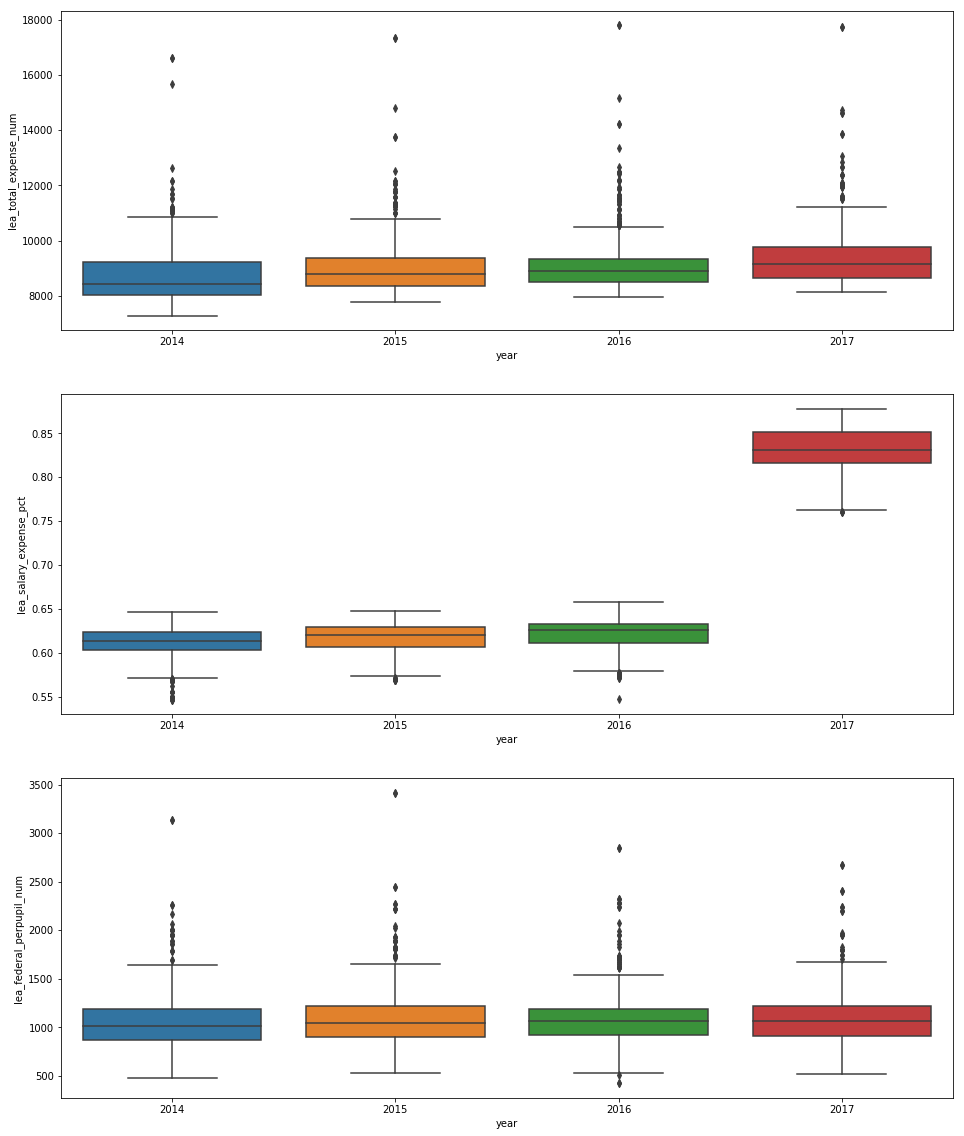

In [7]:
# exp_list = ['lea_total_expense_num','lea_salary_expense_pct','lea_services_expense_pct','lea_supplies_expense_pct','lea_instruct_equip_exp_pct','lea_federal_perpupil_num','lea_local_perpupil_num','lea_state_perpupil_num']
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(16,20))
sns.boxplot(x='year',y='lea_total_expense_num', data = df_final,ax = ax1)
#sns.swarmplot(x="year", y="ACTMath_ACTBenchmark_All", data=df_final, ax=ax1)
sns.boxplot(x='year',y='lea_salary_expense_pct', data = df_final,ax = ax2)
sns.boxplot(x='year',y='lea_federal_perpupil_num', data = df_final,ax = ax3)
#df_final.boxplot(column='F_Female_ENROLL_sch_pct',by = 'year')

**2. Average SAT score from 2014 to 2017:**

The average SAT score has a big range.The potential reason might be that for different years, the average SAT varies. 

From the boxplot of the SAT participation percentage and AP participation percentage below, there are little skewness in the boxplots of these features. Most of these plots are telling that the medians are in the middle of the box. The medians are very close or are the same to the means. We noticed that the mean SAT participation rates were decreasing from the year of 2014 to 2017 and the mean AP participation rates were almost the same. From the kernel density plot below, there are two peaks for all 4 years. All of them are bimodal with lower peak around 0 and higher peak around 1000. We have noticed that the year of 2017 had a higher mean of average SAT score than the rest and in the meantime the mean LEA salary expense percentage was the largest among other years. Therefore, comparing to the other three years, in the year of 2017, there was a higher mean average SAT score with a lower mean SAT participation percentage while the mean of LEA salary expense was way higher. 

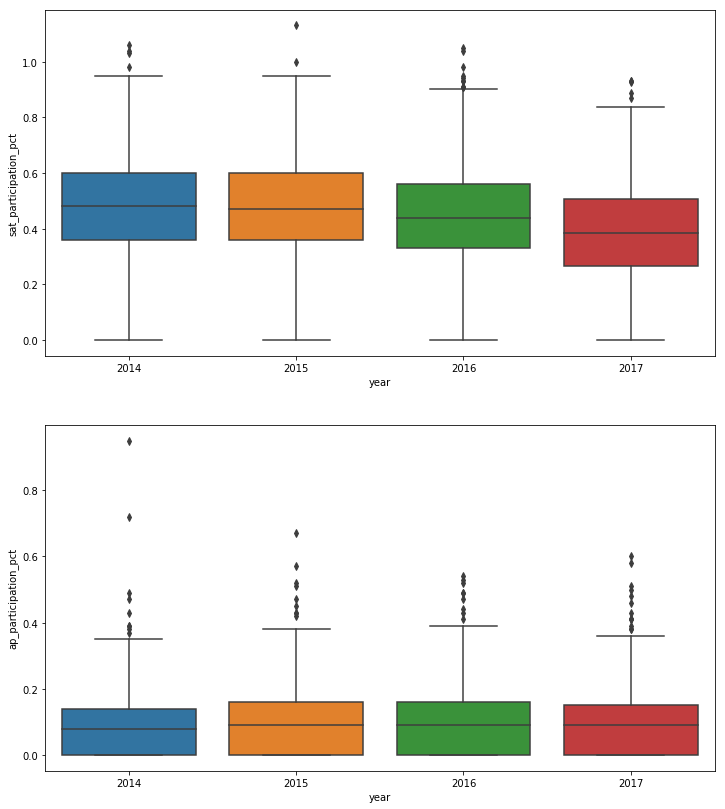

In [8]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(12,14))
sns.boxplot(x='year',y='sat_participation_pct', data = df_final, ax=ax1)
sns.boxplot(x='year',y='ap_participation_pct', data = df_final, ax=ax2)

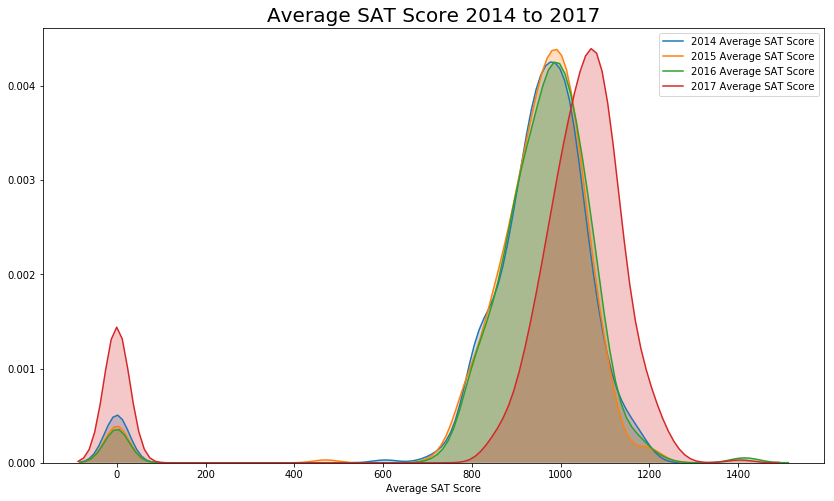

In [9]:
fig, ax= plt.subplots(figsize=(14,8))

ax.set_title('Average SAT Score 2014 to 2017',fontsize=20)
ax.set_xlabel('Average SAT Score')

SAT2014 = df_final.sat_avg_score_num[df_final.year==2014]
sns.kdeplot(SAT2014, label = "2014 Average SAT Score",shade=True)

SAT2015 = df_final.sat_avg_score_num[df_final.year==2015]
sns.kdeplot(SAT2015, label = "2015 Average SAT Score",shade=True)

SAT2016 = df_final.sat_avg_score_num[df_final.year==2016]
sns.kdeplot(SAT2016, label = "2016 Average SAT Score",shade=True)

SAT2017 = df_final.sat_avg_score_num[df_final.year==2017]
sns.kdeplot(SAT2017, label = "2017 Average SAT Score",shade=True)

plt.legend()

**3. Graduation rates of difference genders**

From the density plots of two genders below, we can see there are three peaks with the first peak around 0, second peak around 85 and the third peak around 100. 

Regardless of how long the high school program is, a 4-year or an extended 5-year program, female graduation rate is higher than the male graduation rate from 2014 to 2017. A kernel density plot is provided to show the difference between them. As the plot shown, again, female graduation rate is slightly higher than those of males.

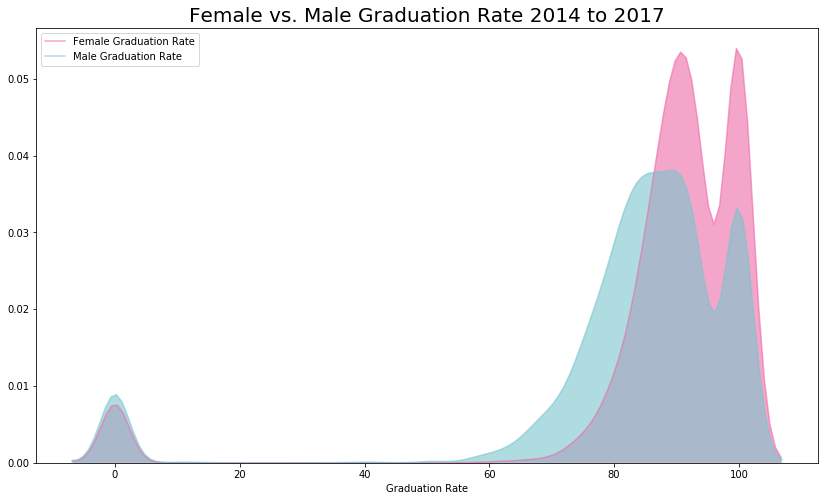

In [10]:
fig, ax= plt.subplots(figsize=(14,8))

ax.set_title('Female vs. Male Graduation Rate 2014 to 2017',fontsize=20)
ax.set_xlabel('Graduation Rate')

df_grad_rate = df_final[['year','GraduationRate_4yr_Female','GraduationRate_4yr_Male',
                        'GraduationRate_5yr_Female','GraduationRate_5yr_Male']]

female_grad = df_grad_rate.GraduationRate_4yr_Female
sns.kdeplot(female_grad,shade=True,label='Female Graduation Rate',color='#EE6AA7',alpha=0.6)
male_grad = df_grad_rate.GraduationRate_4yr_Male
sns.kdeplot(male_grad,shade=True,label='Male Graduation Rate',color ='#7AC5CD',alpha=0.6)
plt.legend()

**4. College enrollment percentage of different genders**

As the graduation rate is showing evidence that females are more likely to graduate than males, the percentage of college enrollment is showing the similar pattern.

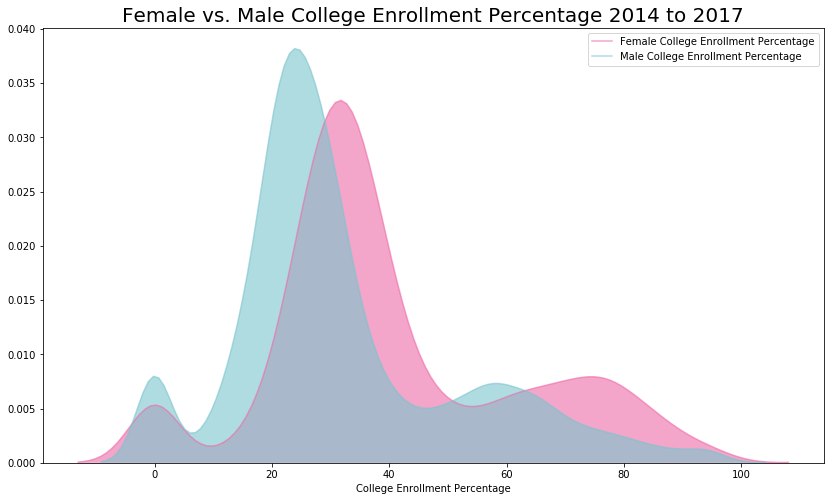

In [11]:
fig, ax= plt.subplots(figsize=(14,8))

ax.set_title('Female vs. Male College Enrollment Percentage 2014 to 2017',fontsize=20)
ax.set_xlabel('College Enrollment Percentage')

df_enroll_rate = df_final[['year','F_Female_ENROLL_sch_pct','M_Male_ENROLL_sch_pct']]

female_enroll = df_enroll_rate.F_Female_ENROLL_sch_pct
sns.kdeplot(female_enroll,shade=True,label='Female College Enrollment Percentage',color='#EE6AA7',alpha=0.6)
male_enroll = df_enroll_rate.M_Male_ENROLL_sch_pct
sns.kdeplot(male_enroll,shade=True,label='Male College Enrollment Percentage',color ='#7AC5CD',alpha=0.6)

plt.legend()

## Data Preparation : Classification Data

The following code blocks will step through the classification data set preperation.

-  **Dataset transformation**:
The orginial dataset *df_final* has the following attribute for enrollment rates, *All_Students_ENROLL_sch_pct*, which represent student college enrollment rate accordingly. 

We will generate a new feature, **binary_ENROLL_sch_pct**, and use for our response variable for the model. We will remove the All_Students_ENROLL_sch_pct feature and the year feature. 

In this step, we will create the binary response of the college enrollment percentage for the future classification analysis. We will split classes at the threshold of 50% enrollment percentage.

In [12]:
# describe of response variable :F_Female_ENROLL_sch_pct,M_Male_ENROLL_sch_pct
df_final[['All_Students_ENROLL_sch_pct']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
All_Students_ENROLL_sch_pct,1904.0,57.047736,18.581799,0.0,50.0,58.972179,68.386627,95.0


In [13]:
# Copy the dataset to preprocess through classification and regression pipelines separately. 
df_class = df_final.copy()

In [14]:
#  1: Collage Enrollment Percentage greater than 50%; 
#  0: Collage Enrollment Percentage less than or equal to 50%;

def f(row):
    if row['All_Students_ENROLL_sch_pct'] > 50:
        val = 1
    else:
        val = 0
    return val

df_class['binary_ENROLL_sch_pct'] = df_final.apply(f, axis=1)

Now, the binary response variable will be assigned to dataframe df_class_target and the features assigned to dataframe df_class_feat.

In [15]:
class_Y = df_class.binary_ENROLL_sch_pct
#class_X = df_class.drop(['All_Students_ENROLL_sch_pct', 'binary_ENROLL_sch_pct', 'year', 'unit_code'], axis=1)
class_X = df_class.drop(['All_Students_ENROLL_sch_pct', 'binary_ENROLL_sch_pct', 'year', 'unit_code','F_Female_ENROLL_sch_pct','M_Male_ENROLL_sch_pct'], axis=1)
class_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 284 entries, student_num to EVAAS Growth Status_NotMet
dtypes: float64(264), int64(20)
memory usage: 4.1 MB


### Classification Response Variable
We can see below that the newly created binary_ENROLL_sch_pct has excessive class bias. This will be noted and addressed by stratification during cross validation.  


In [16]:
#check for class bias based on our thresholds used.  
class_Y.value_counts()

1    1421
0     483
Name: binary_ENROLL_sch_pct, dtype: int64

### Classification Features Description
Below is an overview of the features select for the classification task. These feature descriptions are included in the previous section while the summary statistics are given below. 

In [17]:
class_X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
student_num,1904.0,849.853466,588.307262,8.000000,326.500000,783.500000,1221.250000,2966.000000
lea_avg_student_num,1904.0,830.111870,357.643945,105.000000,584.500000,810.000000,974.000000,1852.000000
st_avg_student_num,1904.0,828.354517,105.106371,252.000000,837.000000,848.000000,853.000000,860.000000
Biology_Size,1904.0,18.629727,5.607309,0.000000,16.000000,19.000000,23.000000,32.000000
English II_Size,1904.0,19.313550,5.510312,0.000000,17.000000,20.000000,23.000000,35.000000
Math I_Size,1904.0,18.243172,5.544849,0.000000,16.000000,19.000000,22.000000,37.000000
lea_total_expense_num,1904.0,9093.345021,1204.493613,7282.190000,8362.900000,8820.080000,9405.800000,17801.850000
lea_salary_expense_pct,1904.0,0.670409,0.095046,0.547000,0.611000,0.626000,0.655000,0.878000
lea_services_expense_pct,1904.0,0.081126,0.016536,0.047000,0.069000,0.080500,0.089000,0.153000
lea_supplies_expense_pct,1904.0,0.081555,0.015932,0.028000,0.071000,0.081000,0.091000,0.143000


# Modeling and Evaluation 1 [10 points]
**Train and adjust parameters**

We will apply the following clustering methods to the data preprocessing. Each method will iterate through several parameters searching for the best parameter. Once that is complete, the best parameter settings for each of the 4 methods will then be compared to each other to determine the best method (and it's best parameters). 

- **K-Means:** The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.
 - REFERENCE: http://scikit-learn.org/stable/modules/clustering.html#k-means
 
- **MiniBatch K-Means:** The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.
 - REFERENCE: http://scikit-learn.org/stable/modules/clustering.html#k-means
 
- **DBSCAN:** Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density. There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster. 
 - REFERENCE: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

- **Agglomerative:** This is a hierarchical clustering method that uses a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:
 - Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
 - Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
 - Average linkage minimizes the average of the distances between all observations of pairs of clusters. 
 - REFERENCE: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html


### 1. Classification with K-Means clustering

In [18]:
%%time 
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
# school features
exp_list = class_X[['lea_total_expense_num','lea_salary_expense_pct','lea_services_expense_pct','lea_supplies_expense_pct',
                     'lea_instruct_equip_exp_pct','lea_federal_perpupil_num','lea_local_perpupil_num','lea_state_perpupil_num']]

# performance scores list
school_performance = class_X[['SPG Score','EVAAS Growth Score','sat_avg_score_num','sat_participation_pct',
                               'ap_participation_pct','ap_pct_3_or_above','total_specialized_courses','univ_college_courses',
                               'avg_daily_attend_pct','crime_per_c_num','short_susp_per_c_num','long_susp_per_c_num',
                               'expelled_per_c_num','stud_internet_comp_num']]

params = []
silhouette = []
bestf1=0
for n_funding in range(4,10):
    for n_spg in range(2,6):
        # get the first clustering
        cls_funding = KMeans(n_clusters=n_funding, init='k-means++',random_state=1)
        cls_funding.fit(exp_list)
        newfeature_funding = cls_funding.labels_ # the labels from kmeans clustering

        # append on the second clustering
        cls_spg = KMeans(n_clusters=n_spg, init='k-means++',random_state=1)
        cls_spg.fit(school_performance)
        newfeature_spg = cls_spg.labels_ # the labels from kmeans clustering

        y = class_Y
        X = class_X.drop(['lea_total_expense_num','lea_salary_expense_pct','lea_services_expense_pct',
                                'lea_supplies_expense_pct','lea_instruct_equip_exp_pct','lea_federal_perpupil_num',
                                'lea_local_perpupil_num','lea_state_perpupil_num','SPG Score','EVAAS Growth Score',
                                'sat_avg_score_num','sat_participation_pct','ap_participation_pct','ap_pct_3_or_above',
                                'total_specialized_courses','univ_college_courses','avg_daily_attend_pct',
                                'crime_per_c_num','short_susp_per_c_num','long_susp_per_c_num',
                                'expelled_per_c_num','stud_internet_comp_num'], axis=1)

        X = np.column_stack((X,pd.get_dummies(newfeature_funding),pd.get_dummies(newfeature_spg)))
        
        cls_silhouette_funding =  silhouette_score(exp_list, newfeature_funding, metric='euclidean')

        cls_silhouette_spg =  silhouette_score(school_performance, newfeature_spg, metric='euclidean')
 
        f1_score = cross_val_score(clf_rf,X,y=y,cv=class_cv,scoring='f1')
    
        params.append((n_funding,n_spg,f1_score.mean(),f1_score.std())) # save state
        silhouette.append((n_funding,n_spg,cls_silhouette_funding,cls_silhouette_spg))
        print()
        print('Silhouette_score on school funding feature clusters:' ,cls_silhouette_funding)
        print('Silhouette_score on school performance feature clusters:',cls_silhouette_spg)
        print (n_funding,"Clusters on school funding",n_spg,"clusters on school performance. Average f1 score = ", f1_score.mean(), "+-",f1_score.std())
        print()
        if f1_score.mean() > bestf1:
            bestf1 = f1_score.mean()
            best_n_spg1 = n_spg
            best_n_funding1 = n_funding
km_best = bestf1


Silhouette_score on school funding feature clusters: 0.44296206685169465
Silhouette_score on school performance feature clusters: 0.8836729946214644
4 Clusters on school funding 2 clusters on school performance. Average f1 score =  0.8834318921738724 +- 0.015118743908387121


Silhouette_score on school funding feature clusters: 0.44296206685169465
Silhouette_score on school performance feature clusters: 0.5120732889299858
4 Clusters on school funding 3 clusters on school performance. Average f1 score =  0.8786353754809697 +- 0.011751597069055882


Silhouette_score on school funding feature clusters: 0.44296206685169465
Silhouette_score on school performance feature clusters: 0.46700928726281166
4 Clusters on school funding 4 clusters on school performance. Average f1 score =  0.8760307924092692 +- 0.01767425732610406


Silhouette_score on school funding feature clusters: 0.44296206685169465
Silhouette_score on school performance feature clusters: 0.43011938596830435
4 Clusters on scho

In [19]:
print('Since we are still focusing on classification, we are not using clustering performance metrics to make decisions.') 
print('Instead, we are still looking at classification metrics.') 
print('The best mean f1 score is', km_best, 'with', best_n_funding1,'clusters in funding features and', best_n_spg1,'clusters in performance features.')

Since we are still focusing on classification, we are not using clustering performance metrics to make decisions.
Instead, we are still looking at classification metrics.
The best mean f1 score is 0.8867313289186131 with 7 clusters in funding features and 5 clusters in performance features.


In [20]:
params = pd.DataFrame(params)
params.columns = ['funding_cls', 'perf_cls','f1_mean','f1_std']
params = params.sort_values(by=['f1_mean'],ascending=False)
params.head()

,funding_cls,perf_cls,f1_mean,f1_std
15,7,5,0.886731,0.016288
8,6,2,0.884358,0.015162
3,4,5,0.883718,0.011808
0,4,2,0.883432,0.015119
13,7,3,0.883020,0.017995


Silhouette is a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object lies within its cluster.

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

The following score silhouette shows the current numbers of clusters are good. But since we are still focusing on classification and see whether using clusters inside classification is improving the overall performance, we will instead use the mean f1 score to decide the number of clusters.

In [21]:
silhouette = pd.DataFrame(silhouette)
silhouette.columns = ['funding_cls', 'perf_cls','silhouette_funding','silhouette_spg']

silhouette = silhouette.sort_values(by=['silhouette_funding'],ascending=False)
silhouette.head()

,funding_cls,perf_cls,silhouette_funding,silhouette_spg
0,4,2,0.442962,0.883673
2,4,4,0.442962,0.467009
3,4,5,0.442962,0.430119
1,4,3,0.442962,0.512073
4,5,2,0.409589,0.883673


### 2. Classification with Mini-Batch K-Means clustering

In [22]:
%%time 
from sklearn.cluster import MiniBatchKMeans

params = []
silhouette = []
bestf1=0
for n_funding in range(4,10):
    for n_spg in range(2,6):
        # get the first clustering
        mini_funding = MiniBatchKMeans(n_clusters=n_funding, init='k-means++',random_state=1)
        mini_funding.fit(exp_list)
        newfeature_funding_mini = mini_funding.labels_ # the labels from kmeans clustering

        # append on the second clustering
        mini_spg = MiniBatchKMeans(n_clusters=n_spg, init='k-means++',random_state=1)
        mini_spg.fit(school_performance)
        newfeature_spg_mini= mini_spg.labels_ # the labels from kmeans clustering

        y = class_Y
        X = class_X.drop(['lea_total_expense_num','lea_salary_expense_pct','lea_services_expense_pct',
                                'lea_supplies_expense_pct','lea_instruct_equip_exp_pct','lea_federal_perpupil_num',
                                'lea_local_perpupil_num','lea_state_perpupil_num','SPG Score','EVAAS Growth Score',
                                'sat_avg_score_num','sat_participation_pct','ap_participation_pct','ap_pct_3_or_above',
                                'total_specialized_courses','univ_college_courses','avg_daily_attend_pct',
                                'crime_per_c_num','short_susp_per_c_num','long_susp_per_c_num',
                                'expelled_per_c_num','stud_internet_comp_num'], axis=1)

        X = np.column_stack((X,pd.get_dummies(newfeature_funding_mini),pd.get_dummies(newfeature_spg_mini)))
        
        mini_silhouette_funding =  silhouette_score(exp_list, newfeature_funding_mini, metric='euclidean')

        mini_silhouette_spg =  silhouette_score(school_performance, newfeature_spg_mini, metric='euclidean')
 
        f1_score = cross_val_score(clf_rf,X,y=y,cv=class_cv,scoring='f1')
        params.append((n_funding,n_spg,f1_score.mean(),f1_score.std())) # save state
        silhouette.append((n_funding,n_spg,mini_silhouette_funding,mini_silhouette_spg))
        print()
        print('Silhouette_score on school funding feature clusters:' ,mini_silhouette_funding)
        print('Silhouette_score on school performance feature clusters:',mini_silhouette_spg)
        print (n_funding,"Clusters on school funding",n_spg,"clusters on school performance. Average f1 score = ", f1_score.mean(), "+-",f1_score.std())
        print()
        if f1_score.mean() > bestf1:
            bestf1 = f1_score.mean()
            best_n_spg2 = n_spg
            best_n_funding2 = n_funding
mbkm_best = bestf1



Silhouette_score on school funding feature clusters: 0.3646804054046361
Silhouette_score on school performance feature clusters: 0.8836729946214644
4 Clusters on school funding 2 clusters on school performance. Average f1 score =  0.8781479409944939 +- 0.013266441439167283


Silhouette_score on school funding feature clusters: 0.3646804054046361
Silhouette_score on school performance feature clusters: 0.5110545419075504
4 Clusters on school funding 3 clusters on school performance. Average f1 score =  0.8782224158586107 +- 0.014109601770221055


Silhouette_score on school funding feature clusters: 0.3646804054046361
Silhouette_score on school performance feature clusters: 0.46789193925847006
4 Clusters on school funding 4 clusters on school performance. Average f1 score =  0.8735389181502964 +- 0.010940145314678547


Silhouette_score on school funding feature clusters: 0.3646804054046361
Silhouette_score on school performance feature clusters: 0.43685124570958805
4 Clusters on school 

In [23]:
print('Since we are still focusing on classification, we are not using clustering performance metrics to make decisions.')
print('Instead, we are still looking at classification metrics.') 
print('The best mean f1 score is', mbkm_best, 'with', best_n_funding2,'clusters in funding features and', best_n_spg2,'clusters in performance features.')

Since we are still focusing on classification, we are not using clustering performance metrics to make decisions.
Instead, we are still looking at classification metrics.
The best mean f1 score is 0.8853700358077139 with 4 clusters in funding features and 5 clusters in performance features.


In [24]:
params = pd.DataFrame(params)
params.columns = ['funding_cls', 'perf_cls','f1_mean','f1_std']
params = params.sort_values(by=['f1_mean'],ascending=False)
params.head()

,funding_cls,perf_cls,f1_mean,f1_std
3,4,5,0.885370,0.008427
20,9,2,0.883756,0.012311
23,9,5,0.883161,0.013195
11,6,5,0.882930,0.012558
13,7,3,0.882421,0.013909


Silhouette is a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object lies within its cluster.

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

The following score silhouette shows the current numbers of clusters are good. But since we are still focusing on classification and see whether using clusters inside classification is improving the overall performance, we will instead use the mean f1 score to decide the number of clusters.

In [25]:
silhouette = pd.DataFrame(silhouette)
silhouette.columns = ['funding_cls', 'perf_cls','silhouette_funding','silhouette_spg']

silhouette = silhouette.sort_values(by=['silhouette_funding'],ascending=False)
silhouette.head()

,funding_cls,perf_cls,silhouette_funding,silhouette_spg
12,7,2,0.393854,0.883673
13,7,3,0.393854,0.511055
15,7,5,0.393854,0.436851
14,7,4,0.393854,0.467892
8,6,2,0.384697,0.883673


### 3. Classification with DBSCAN clustering

In [26]:
%%time 

from sklearn.cluster import DBSCAN
params = []
silhouette = []
bestf1=0
for eps in range(10,15):
    for mpts in range(15,20):
        # get the first clustering
        dbs_funding =  DBSCAN(eps=eps,min_samples = mpts)
        dbs_funding.fit(exp_list)
        newfeature_funding_dbs = dbs_funding.labels_ # the labels from kmeans clustering

        # append on the second clustering
        dbs_spg =  DBSCAN(eps=eps,min_samples = mpts)
        dbs_spg.fit(school_performance)
        newfeature_spg_dbs = dbs_spg.labels_ # the labels from kmeans clustering

        y = class_Y
        X = class_X.drop(['lea_total_expense_num','lea_salary_expense_pct','lea_services_expense_pct',
                                'lea_supplies_expense_pct','lea_instruct_equip_exp_pct','lea_federal_perpupil_num',
                                'lea_local_perpupil_num','lea_state_perpupil_num','SPG Score','EVAAS Growth Score',
                                'sat_avg_score_num','sat_participation_pct','ap_participation_pct','ap_pct_3_or_above',
                                'total_specialized_courses','univ_college_courses','avg_daily_attend_pct',
                                'crime_per_c_num','short_susp_per_c_num','long_susp_per_c_num',
                                'expelled_per_c_num','stud_internet_comp_num'], axis=1)

        X = np.column_stack((X,pd.get_dummies(newfeature_funding_dbs),pd.get_dummies(newfeature_spg_dbs)))
        
        dbs_silhouette_funding =  silhouette_score(exp_list, newfeature_funding_dbs)

        dbs_silhouette_spg =  silhouette_score(school_performance, newfeature_spg_dbs)
 
        f1_score = cross_val_score(clf_rf,X,y=y,cv=class_cv,scoring='f1')
        params.append((eps,mpts,f1_score.mean(),f1_score.std())) # save state
        silhouette.append((eps,mpts,dbs_silhouette_funding,dbs_silhouette_spg))
        
        print()
        print('Silhouette_score on school funding feature clusters:' ,dbs_silhouette_funding)
        print('Silhouette_score on school performance feature clusters:',dbs_silhouette_spg)
        print (eps,"eps",mpts,"samples: ", f1_score.mean(), "+-",f1_score.std())
        print()
        if f1_score.mean() > bestf1:
            bestf1 = f1_score.mean()
            best_eps = eps
            best_mpts = mpts
dbscan_best = bestf1


Silhouette_score on school funding feature clusters: -0.2803769296710003
Silhouette_score on school performance feature clusters: -0.2714368081797799
10 eps 15 samples:  0.8793419274008094 +- 0.008567948749345553


Silhouette_score on school funding feature clusters: -0.2149559244486438
Silhouette_score on school performance feature clusters: -0.30624183106752395
10 eps 16 samples:  0.8773794184481696 +- 0.013359067907666661


Silhouette_score on school funding feature clusters: -0.20643081639435967
Silhouette_score on school performance feature clusters: -0.3314575424643572
10 eps 17 samples:  0.881474352412227 +- 0.009420912070702819


Silhouette_score on school funding feature clusters: -0.20643081639435967
Silhouette_score on school performance feature clusters: -0.3799476695622243
10 eps 18 samples:  0.8859329145125697 +- 0.012895067475254181


Silhouette_score on school funding feature clusters: -0.20643081639435967
Silhouette_score on school performance feature clusters: -0.415

In [27]:
print('Since we are still focusing on classification, we are not using clustering performance metrics to make decisions.')
print('Instead, we are still looking at classification metrics.') 
print('The best mean f1 score is', dbscan_best, 'with', best_eps,'eps and', best_mpts,'samples.')

Since we are still focusing on classification, we are not using clustering performance metrics to make decisions.
Instead, we are still looking at classification metrics.
The best mean f1 score is 0.88736928835344 with 12 eps and 17 samples.


In [28]:
params = pd.DataFrame(params)
params.columns = ['eps', 'samples','f1_mean','f1_std']
params = params.sort_values(by=['f1_mean'],ascending=False)
params.head()

,eps,samples,f1_mean,f1_std
12,12,17,0.887369,0.014303
8,11,18,0.887211,0.012439
3,10,18,0.885933,0.012895
7,11,17,0.882861,0.013251
11,12,16,0.882457,0.011912


Silhouette is a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object lies within its cluster.

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

The following score silhouette shows the current numbers of clusters are not good because they are negative and all close to zero. But since we are still focusing on classification and see whether using clusters inside classification is improving the overall performance, we will instead use the mean f1 score to decide the number of clusters.

In [29]:

silhouette = pd.DataFrame(silhouette)
silhouette.columns = ['eps', 'mpts','silhouette_funding','silhouette_spg']
silhouette = silhouette.sort_values(by=['silhouette_funding'],ascending=False)
silhouette.head()


,eps,mpts,silhouette_funding,silhouette_spg
12,12,17,-0.206431,-0.110471
9,11,19,-0.206431,-0.203668
23,14,18,-0.206431,0.225073
22,14,17,-0.206431,0.250373
19,13,19,-0.206431,-0.000110


### 4. Classification with Agglomerative clustering

In [30]:
%%time 

from sklearn.cluster import AgglomerativeClustering

params = []
silhouette = []
bestf1=0

for link in ['ward', 'complete', 'average']:
    for n in range(4,11):

        agg_funding = AgglomerativeClustering(n_clusters=n, linkage=link)
        agg_funding.fit(exp_list)
        newfeature_funding_agg = agg_funding.labels_ # the labels from kmeans clustering

        # append on the second clustering
        agg_spg = AgglomerativeClustering(n_clusters=n, linkage=link)
        agg_spg.fit(school_performance)
        newfeature_spg_agg = agg_spg.labels_ # the labels from kmeans clustering

        y = class_Y
        X = class_X.drop(['lea_total_expense_num','lea_salary_expense_pct','lea_services_expense_pct',
                                'lea_supplies_expense_pct','lea_instruct_equip_exp_pct','lea_federal_perpupil_num',
                                'lea_local_perpupil_num','lea_state_perpupil_num','SPG Score','EVAAS Growth Score',
                                'sat_avg_score_num','sat_participation_pct','ap_participation_pct','ap_pct_3_or_above',
                                'total_specialized_courses','univ_college_courses','avg_daily_attend_pct',
                                'crime_per_c_num','short_susp_per_c_num','long_susp_per_c_num',
                                'expelled_per_c_num','stud_internet_comp_num'], axis=1)

        X = np.column_stack((X,pd.get_dummies(newfeature_funding_agg),pd.get_dummies(newfeature_spg_agg)))
        
        agg_silhouette_funding =  silhouette_score(exp_list, newfeature_funding_agg, metric='euclidean')

        agg_silhouette_spg =  silhouette_score(school_performance, newfeature_spg_agg, metric='euclidean')
 
        f1_score = cross_val_score(clf_rf,X,y=y,cv=class_cv,scoring='f1')
        params.append((n,link,f1_score.mean(),f1_score.std())) # save state

        silhouette.append((n,link,agg_silhouette_funding,agg_silhouette_spg))
        
        print()
        print('Silhouette_score on school funding feature clusters:' ,agg_silhouette_funding)
        print('Silhouette_score on school performance feature clusters:',agg_silhouette_spg)
        print (n,"Clusters with",link,"linkage Average accuracy = ", f1_score.mean(), "+-", f1_score.std())
        print()
        if f1_score.mean() > bestf1:
            bestf1 = f1_score.mean()
            best_n = n
            best_link = link
aggl_best=bestf1


Silhouette_score on school funding feature clusters: 0.3667031513514231
Silhouette_score on school performance feature clusters: 0.4579022169967595
4 Clusters with ward linkage Average accuracy =  0.8786171910320872 +- 0.011651594522077232


Silhouette_score on school funding feature clusters: 0.3775315669140115
Silhouette_score on school performance feature clusters: 0.4229106103409924
5 Clusters with ward linkage Average accuracy =  0.8810186824027217 +- 0.015486151021236192


Silhouette_score on school funding feature clusters: 0.3833317314538871
Silhouette_score on school performance feature clusters: 0.3846852719494859
6 Clusters with ward linkage Average accuracy =  0.8847027182632345 +- 0.016183481944467455


Silhouette_score on school funding feature clusters: 0.34244125693998945
Silhouette_score on school performance feature clusters: 0.3433820301697906
7 Clusters with ward linkage Average accuracy =  0.8805490925252034 +- 0.012279285019723462


Silhouette_score on school fun

In [31]:
print('The best mean f1 score is',aggl_best,'and occurs at', best_n, 'clusters with', best_link, 'linkage.')

The best mean f1 score is 0.8851500927778732 and occurs at 10 clusters with complete linkage.


In [32]:
params = pd.DataFrame(params)
params.columns = ['n', 'link','f1_mean','f1_std']
params = params.sort_values(by=['f1_mean'],ascending=False)
params.head()

,n,link,f1_mean,f1_std
13,10,complete,0.885150,0.009089
11,8,complete,0.884902,0.009075
2,6,ward,0.884703,0.016183
10,7,complete,0.884103,0.011772
19,9,average,0.882396,0.011230


Silhouette is a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object lies within its cluster.

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

The following score silhouette shows the current number of clusters are good. But since we are still focusing on classification and see whether using clusters inside classification is improving the overall performance, we will instead use the mean f1 score to decide the number of clusters.

In [33]:
silhouette = pd.DataFrame(silhouette)
silhouette.columns = ['n', 'link','silhouette_funding','silhouette_spg']
silhouette = silhouette.sort_values(by=['silhouette_funding'],ascending=False)
silhouette.head()

,n,link,silhouette_funding,silhouette_spg
7,4,complete,0.574990,0.496489
14,4,average,0.554376,0.674886
8,5,complete,0.541997,0.494427
16,6,average,0.541443,0.470718
15,5,average,0.540714,0.475160


# Modeling and Evaluation 2 [10 points]
**Evaluate and Compare**

Here is a brief sumnmary of the F1 score from 4 different clustering methods.

In [34]:
max_f1 = max(km_best,mbkm_best,dbscan_best,aggl_best)
cluster_evaluate = pd.DataFrame([
                    ['k-means',best_n_funding1,best_n_spg1,km_best], 
                    ['minibatch',best_n_funding2,best_n_spg2,mbkm_best],
                    ['DBSCAN',best_eps,best_mpts,dbscan_best],
                    ['Agglomerative',best_n,best_link,aggl_best]           
                    ], columns = ['Model', 'Best Cluster1/EPS/n','Best Cluster2/MPTS/Link','F1 Score'])
cluster_evaluate = cluster_evaluate.sort_values(by=['F1 Score'],ascending=False)
cluster_evaluate

,Model,Best Cluster1/EPS/n,Best Cluster2/MPTS/Link,F1 Score
2,DBSCAN,12,17,0.887369
0,k-means,7,5,0.886731
1,minibatch,4,5,0.885370
3,Agglomerative,10,complete,0.885150


In [35]:
print('The highest f1 score occurs at:')
cluster_evaluate.head(1)

The highest f1 score occurs at:


,Model,Best Cluster1/EPS/n,Best Cluster2/MPTS/Link,F1 Score
2,DBSCAN,12,17,0.887369


###  Now put clusters inside the classification model.
We will now take the top ranking clustering method with best parameterization and apply it to the Random Forest object. Due to the ever changing cluster output (and we haven't found a way to seed or fix the output based on each run), we will pass a token and have the code blocks below determine which method/parameters to use. 

We will evaluate the cluster preprocess model vs. regular model. 

In [36]:
#Create a Random Forest object and perform a grid search to find the best parameters using clusters
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

exp_list2 = class_X[['lea_total_expense_num','lea_salary_expense_pct','lea_services_expense_pct','lea_supplies_expense_pct',
                     'lea_instruct_equip_exp_pct','lea_federal_perpupil_num','lea_local_perpupil_num','lea_state_perpupil_num']]

# performance scores list
school_performance2 = class_X[['SPG Score','EVAAS Growth Score','sat_avg_score_num','sat_participation_pct',
                               'ap_participation_pct','ap_pct_3_or_above','total_specialized_courses','univ_college_courses',
                               'avg_daily_attend_pct','crime_per_c_num','short_susp_per_c_num','long_susp_per_c_num',
                               'expelled_per_c_num','stud_internet_comp_num']]

In [37]:
max_f1 = max(km_best,mbkm_best,dbscan_best,aggl_best)

if max_f1 == km_best:
    cls_funding = KMeans(n_clusters=best_n_funding1, init='k-means++',random_state=1)
    cls_funding.fit(exp_list2)
    newfeature_funding = cls_funding.labels_ 
    
    cls_spg = KMeans(n_clusters=best_n_spg1, init='k-means++',random_state=1)
    cls_spg.fit(school_performance2)
    newfeature_spg = cls_spg.labels_ 
    
elif max_f1 == mbkm_best:
    mini_funding = MiniBatchKMeans(n_clusters=best_n_funding2, init='k-means++',random_state=1)
    mini_funding.fit(exp_list2)
    newfeature_funding = mini_funding.labels_ # the labels from kmeans clustering

    mini_spg = MiniBatchKMeans(n_clusters=best_n_spg2, init='k-means++',random_state=1)
    mini_spg.fit(school_performance2)
    newfeature_spg= mini_spg.labels_ # the labels from kmeans clustering
    
elif max_f1 == dbscan_best:
    dbs_funding =  DBSCAN(eps=best_eps,min_samples = best_mpts)
    dbs_funding.fit(exp_list2)
    newfeature_funding = dbs_funding.labels_ # the labels from clustering

    dbs_spg =  DBSCAN(eps=best_eps,min_samples = best_mpts)
    dbs_spg.fit(school_performance2)
    newfeature_spg = dbs_spg.labels_ # the labels from clustering
    
elif max_f1 == aggl_best:
    agg_funding = AgglomerativeClustering(n_clusters=best_n, linkage=best_link)
    agg_funding.fit(exp_list2)
    newfeature_funding = agg_funding.labels_ # the labels from kmeans clustering

    agg_spg = AgglomerativeClustering(n_clusters=best_n, linkage=best_link)
    agg_spg.fit(school_performance2)
    newfeature_spg = agg_spg.labels_ # the labels from kmeans clustering

In [38]:
# Just a checksum to confirm automation catches the cluster we want. 
print(all(newfeature_funding==cls_funding.labels_))
print(all(newfeature_funding==mini_funding.labels_))
print(all(newfeature_funding==dbs_funding.labels_))
print(all(newfeature_funding == agg_funding.labels_))
print()
print(all(newfeature_spg == cls_spg.labels_ ))
print(all(newfeature_spg == mini_spg.labels_ ))
print(all(newfeature_spg ==  dbs_spg.labels_ ))
print(all(newfeature_spg == agg_spg.labels_ ))

False
False
True
False

False
False
True
False


In [39]:
class_Y2 = class_Y
class_X2 = class_X.drop(['lea_total_expense_num','lea_salary_expense_pct','lea_services_expense_pct',
                                'lea_supplies_expense_pct','lea_instruct_equip_exp_pct','lea_federal_perpupil_num',
                                'lea_local_perpupil_num','lea_state_perpupil_num','SPG Score','EVAAS Growth Score',
                                'sat_avg_score_num','sat_participation_pct','ap_participation_pct','ap_pct_3_or_above',
                                'total_specialized_courses','univ_college_courses','avg_daily_attend_pct',
                                'crime_per_c_num','short_susp_per_c_num','long_susp_per_c_num',
                                'expelled_per_c_num','stud_internet_comp_num'], axis=1)

class_X2 = np.column_stack((class_X2,pd.get_dummies(newfeature_funding),pd.get_dummies(newfeature_spg)))

# let's use pared down list for time sake
parameters = { 'min_samples_split':[2,3,4,5,6]
              ,'n_estimators' : [500]
              ,'min_samples_leaf': [10, 25, 50, 75]
              ,'n_jobs':[8] 
              ,'random_state': [7331]}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
classGridSearch = GridSearchCV(estimator=clf_rf
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=class_cv # KFolds = cv set above
                   , scoring=f1_scorer) # chose this due to possible class bias

In [40]:
classGridSearch.fit(class_X2, class_Y2)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   45.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  3.9min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=7331, test_size=0.15,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'n_estimators': [500], 'min_samples_leaf': [10, 25, 50, 75], 'n_jobs': [8], 'random_state': [7331]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=1)

In [41]:
#Print the parameterization of the best estimator
classGridSearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=8,
            oob_score=False, random_state=7331, verbose=0,
            warm_start=False)

In [42]:
cls_class_model =  classGridSearch.best_estimator_

## Now compare to our Random Forest model without clustering. 

In [43]:
#Create a Random Forest object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

#Set up RF parameters to test (WARNING: This is gonna take a while!!!) 
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
#parameters = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

# let's use pared down list for time sake
parameters = { 'min_samples_split':[2,3,4,5,6]
              ,'n_estimators' : [500]
              ,'min_samples_leaf': [10, 25, 50, 75]
              ,'n_jobs':[8] 
              ,'random_state': [7331]}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
classGridSearch = GridSearchCV(estimator=clf_rf
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=class_cv # KFolds = cv set above
                   , scoring=f1_scorer) # chose this due to possible class bias

#Perform hyperparameter search to find the best combination of parameters for our data
classGridSearch.fit(class_X, class_Y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   52.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  3.6min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=7331, test_size=0.15,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'n_estimators': [500], 'min_samples_leaf': [10, 25, 50, 75], 'n_jobs': [8], 'random_state': [7331]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=1)

In [44]:
#Print the parameterization of the best estimator
classGridSearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=8,
            oob_score=False, random_state=7331, verbose=0,
            warm_start=False)

In [45]:
classEstimator = classGridSearch.best_estimator_

**Evaluate metrics of the two models.**

In [46]:
from sklearn.model_selection import cross_validate
def EvaluateClassEstimator(classEstimator, class_X, class_Y, class_cv):
    
    scores = cross_validate(classEstimator, class_X, class_Y, scoring=class_errorScoring, cv=class_cv, return_train_score=True)

    #print mean Accuracy for all folds 
    AccAvg = scores['test_accuracy'].mean()
    print_str = "The average accuracy for all cv folds is: \t {AccAvg:.3}"
    print(print_str.format(AccAvg=AccAvg))

    #print mean Precision for all folds
    Prec_avg = scores['test_precision'].mean()
    print_str = "The average precision for all cv folds is: \t {Prec_avg:.3}"
    print(print_str.format(Prec_avg=Prec_avg))

    #print mean recall for all folds 
    Recall_avg = scores['test_recall'].mean()
    print_str = "The average recall for all cv folds is: \t {Recall_avg:.3}"
    print(print_str.format(Recall_avg=Recall_avg))
    
    #print mean F-measure for all folds 
    f1_avg = scores['test_f1'].mean()
    print_str = "The average F-measure for all cv folds is: \t {f1_avg:.3}"
    print(print_str.format(f1_avg=f1_avg))
    print('*********************************************************')

    print('Cross Validation Fold Scores')
    scoresResults = pd.DataFrame()
    scoresResults['accuracy'] = scores['test_accuracy']
    scoresResults['precision'] = scores['test_precision']
    scoresResults['recall'] = scores['test_recall']
    scoresResults['f1'] = scores['test_f1']
    return scoresResults

**First, we will look at the Random Forest model with clustering.**

In [47]:
#Evaluate the class estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassEstimator(cls_class_model,class_X2, class_Y2, class_cv)

The average accuracy for all cv folds is: 	 0.835
The average precision for all cv folds is: 	 0.846
The average recall for all cv folds is: 	 0.953
The average F-measure for all cv folds is: 	 0.896
*********************************************************
Cross Validation Fold Scores


,accuracy,precision,recall,f1
0,0.832168,0.842324,0.953052,0.894273
1,0.846154,0.856540,0.953052,0.902222
2,0.828671,0.841667,0.948357,0.891832
3,0.870629,0.866667,0.976526,0.918322
4,0.842657,0.847107,0.962441,0.901099
5,0.856643,0.864407,0.957746,0.908686
6,0.807692,0.829167,0.934272,0.878587
7,0.818182,0.831276,0.948357,0.885965
8,0.818182,0.828571,0.953052,0.886463
9,0.828671,0.847458,0.938967,0.890869


In [48]:
cls_prediction = cls_class_model.predict(class_X2)

In [49]:
from sklearn.metrics import confusion_matrix
print("Random Forests with clustering Confusion Matrix\n", confusion_matrix(class_Y2, cls_prediction))

Random Forests with clustering Confusion Matrix
 [[ 326  157]
 [  17 1404]]


**Next, we will look at the Random Forest model without clustering.**

In [50]:
#Evaluate the class estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassEstimator(classEstimator, class_X, class_Y, class_cv)

The average accuracy for all cv folds is: 	 0.837
The average precision for all cv folds is: 	 0.845
The average recall for all cv folds is: 	 0.956
The average F-measure for all cv folds is: 	 0.897
*********************************************************
Cross Validation Fold Scores


,accuracy,precision,recall,f1
0,0.825175,0.838174,0.948357,0.889868
1,0.856643,0.858333,0.967136,0.909492
2,0.825175,0.841004,0.943662,0.889381
3,0.863636,0.859504,0.976526,0.914286
4,0.846154,0.850622,0.962441,0.903084
5,0.856643,0.861345,0.962441,0.909091
6,0.814685,0.830579,0.943662,0.883516
7,0.818182,0.831276,0.948357,0.885965
8,0.825175,0.827309,0.967136,0.891775
9,0.835664,0.854701,0.938967,0.894855


In [51]:
rf_predictions = classEstimator.predict(class_X)

In [52]:
print("Random Forests Confusion Matrix\n", confusion_matrix(class_Y, rf_predictions))

Random Forests Confusion Matrix
 [[ 336  147]
 [  11 1410]]


**Finally, we will take a look at some side-by-side comparisons.**

In [53]:
rf_TN=float(confusion_matrix(class_Y, rf_predictions)[0,0])
rf_TP=float(confusion_matrix(class_Y, rf_predictions)[1,1])
rf_FN=float(confusion_matrix(class_Y, rf_predictions)[1,0])
rf_FP=float(confusion_matrix(class_Y, rf_predictions)[0,1])
rf_TPR=rf_TP/(rf_TP+rf_FN)
rf_TNR=rf_TN/(rf_TN+rf_FP)
rf_PPV=rf_TP/(rf_TP+rf_FP)
rf_ACC=(rf_TP+rf_TN)/(rf_TP+rf_TN+rf_FP+rf_FN)
rf_ERR=(rf_FP+rf_FN)/(rf_TP+rf_TN+rf_FP+rf_FN) 
rf_F1=(2*rf_TP)/((2*rf_TP)+rf_FP+rf_FN) 

cls_TN=float(confusion_matrix(class_Y, cls_prediction)[0,0])
cls_TP=float(confusion_matrix(class_Y, cls_prediction)[1,1])
cls_FN=float(confusion_matrix(class_Y, cls_prediction)[1,0])
cls_FP=float(confusion_matrix(class_Y, cls_prediction)[0,1])
cls_TPR=cls_TP/(cls_TP+cls_FN)
cls_TNR=cls_TN/(cls_TN+cls_FP)
cls_PPV=cls_TP/(cls_TP+cls_FP)
cls_ACC=(cls_TP+cls_TN)/(cls_TP+cls_TN+cls_FP+cls_FN)
cls_ERR=(cls_FP+cls_FN)/(cls_TP+cls_TN+cls_FP+cls_FN) 
cls_F1=(2*cls_TP)/((2*cls_TP)+cls_FP+cls_FN) 

In [54]:
class_metric_df = pd.DataFrame(columns=['Model Name','Accuracy','Sensitivity/Recall','Specificity','Precision','Error Rate','F1 Score'])
class_metric_df['Model Name'] = ['Random Forests','Random Forests with clusters']
class_metric_df['Sensitivity/Recall'] = [rf_TPR, cls_TPR]
class_metric_df['Specificity']=[rf_TNR,cls_TNR]
class_metric_df['Precision']=[rf_PPV,cls_PPV]
class_metric_df['Accuracy'] = [rf_ACC,cls_ACC] 
class_metric_df['Error Rate']=[rf_ERR,cls_ERR]
class_metric_df['F1 Score']=[rf_F1,cls_F1]
class_metric_df


,Model Name,Accuracy,Sensitivity/Recall,Specificity,Precision,Error Rate,F1 Score
0,Random Forests,0.917017,0.992259,0.695652,0.905588,0.082983,0.946944
1,Random Forests with clusters,0.908613,0.988037,0.674948,0.899423,0.091387,0.941650


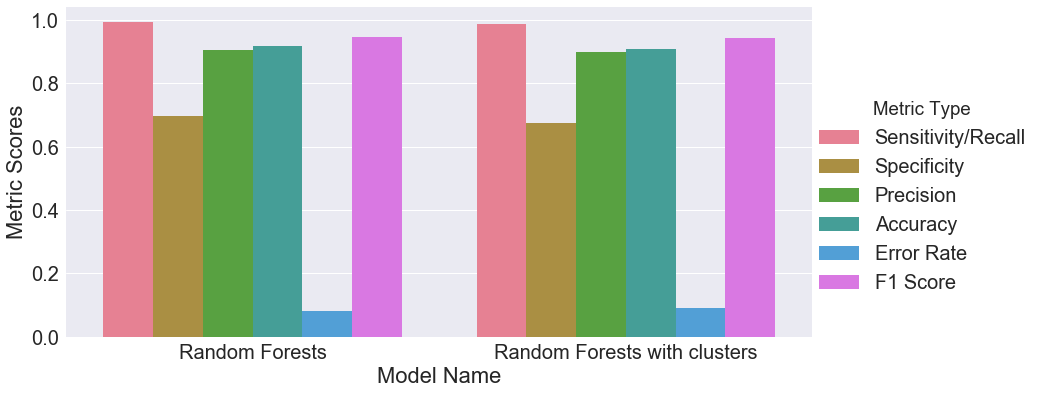

In [55]:
valuevar = ['Sensitivity/Recall','Specificity','Precision','Accuracy','Error Rate','F1 Score']
idvar = list(class_metric_df)
idvar.remove('Sensitivity/Recall')
idvar.remove('Specificity')
idvar.remove('Precision')
idvar.remove('Accuracy')
idvar.remove('Error Rate')
idvar.remove('F1 Score')
metric_df = pd.melt(class_metric_df, id_vars = idvar,                                            
                        value_vars=valuevar,
                        var_name='Metric Type', value_name='Metric Scores')
sns.set(font_scale=2) 
sns.factorplot(x='Model Name', y='Metric Scores', hue='Metric Type', data=metric_df, kind='bar',
               size=6,aspect=2,palette="husl")

As can be seen by several of the cells above, both of these models run fairly even in terms of processing speed and metrics. It appears that running the RF without clusters has a slight advantage in the metrics, and might be the selection of choice in this case due to ease of coding vs. clustering. 

# Modeling and Evaluation 3 [10 points]
**Visualize Results**

**We have focused our visualizations on the different clustering methods in use with this data instead of reiterating classification visualizations above. Since our clustering is a part of the data pre-processing, this might normally be in those sections we believe.**

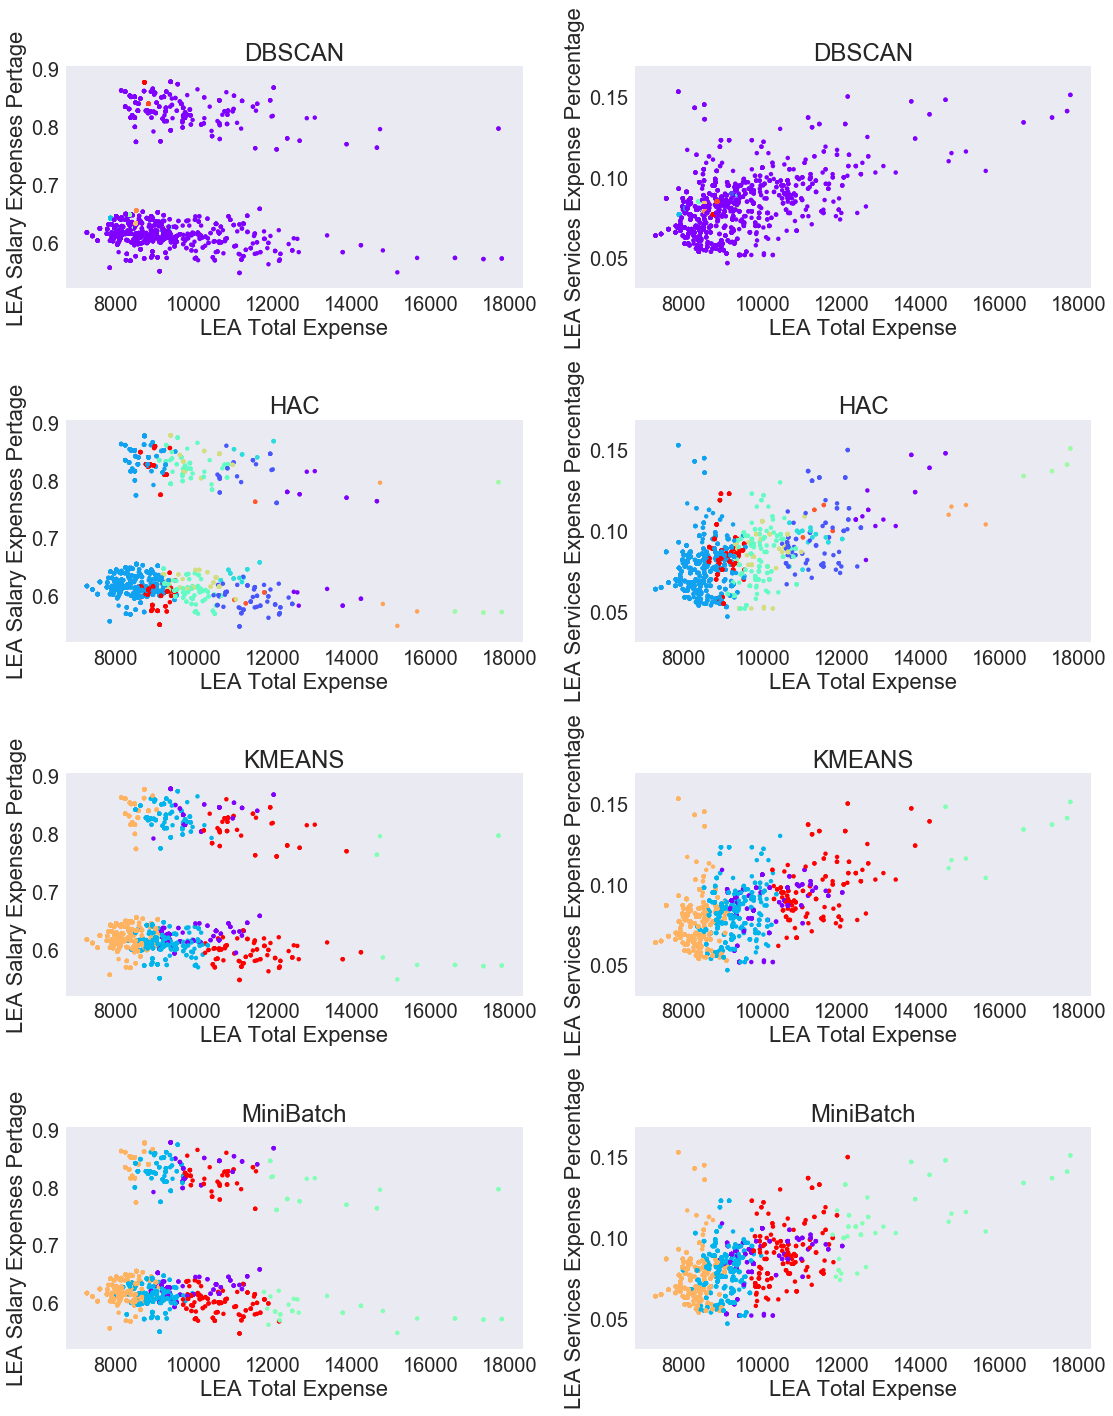

In [56]:
#code

data_funding = exp_list2

cls_funding = KMeans(n_clusters=best_n_spg1, init='k-means++',random_state=1)
cls_funding.fit(exp_list2)
newfeature_funding = cls_funding.labels_ # the labels from kmeans clustering

mini_funding = MiniBatchKMeans(n_clusters=best_n_spg2, init='k-means++',random_state=1)
mini_funding.fit(exp_list2)
newfeature_funding_mini = mini_funding.labels_ # the labels from kmeans clustering

dbs_funding =  DBSCAN(eps=best_eps,min_samples = best_mpts)
dbs_funding.fit(exp_list2)
newfeature_funding_dbs = dbs_funding.labels_


agg_funding = AgglomerativeClustering(n_clusters=best_n, linkage=best_link)
agg_funding.fit(exp_list2)
newfeature_funding_agg = agg_funding.labels_



        
fig = plt.figure(figsize=(16,20))
title = ['DBSCAN','HAC','KMEANS','MiniBatch']

for i,l in enumerate([newfeature_funding_dbs,newfeature_funding_agg,newfeature_funding,newfeature_funding_mini]):
    
    plt.subplot(4,2,2*i+1)
    plt.scatter(data_funding['lea_total_expense_num'], data_funding['lea_salary_expense_pct'],c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('LEA Total Expense'), plt.ylabel('LEA Salary Expenses Pertage')
    plt.grid()
    plt.title(title[i])
    
    plt.subplot(4,2,2*i+2)
    plt.scatter(data_funding['lea_total_expense_num'], data_funding['lea_services_expense_pct'], c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('LEA Total Expense'), plt.ylabel('LEA Services Expense Percentage')
    plt.grid()
    plt.title(title[i])

plt.tight_layout()
plt.show()

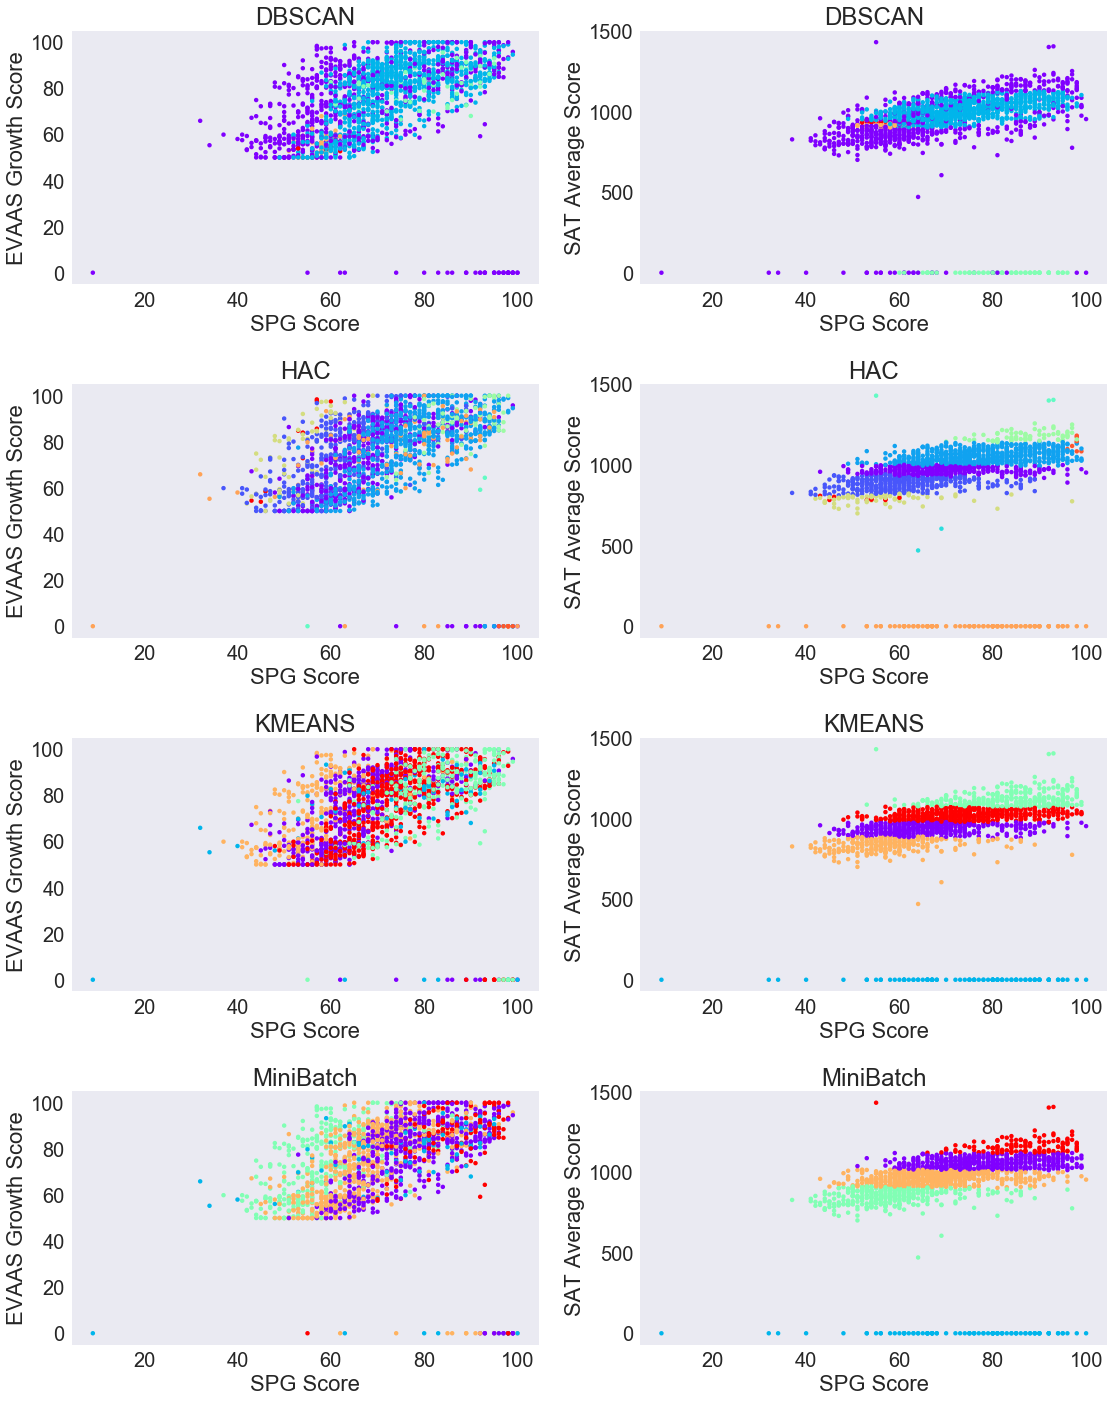

In [57]:
#code

data_perform = school_performance2

# append on the second clustering
cls_spg = KMeans(n_clusters=best_n_spg1, init='k-means++',random_state=1)
cls_spg.fit(school_performance2)
newfeature_spg = cls_spg.labels_ # the labels from kmeans clustering


mini_spg = MiniBatchKMeans(n_clusters=best_n_spg2, init='k-means++',random_state=1)
mini_spg.fit(school_performance2)
newfeature_spg_mini= mini_spg.labels_ # the labels from kmeans clustering

# append on the second clustering
dbs_spg =  DBSCAN(eps=best_eps,min_samples = best_mpts)
dbs_spg.fit(school_performance2)
newfeature_spg_dbs = dbs_spg.labels_ # the labels from kmeans clustering

# append on the second clustering
agg_spg = AgglomerativeClustering(n_clusters=best_n, linkage=best_link)
agg_spg.fit(school_performance2)
newfeature_spg_agg = agg_spg.labels_ # the labels from kmeans clustering


        
fig = plt.figure(figsize=(16,20))
title = ['DBSCAN','HAC','KMEANS','MiniBatch']

for i,l in enumerate([newfeature_spg_dbs,newfeature_spg_agg,newfeature_spg,newfeature_spg_mini]):
    
    plt.subplot(4,2,2*i+1)
    plt.scatter(data_perform['SPG Score'], data_perform['EVAAS Growth Score'],c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('SPG Score'), plt.ylabel('EVAAS Growth Score')
    plt.grid()
    plt.title(title[i])
    
    plt.subplot(4,2,2*i+2)
    plt.scatter(data_perform['SPG Score'], data_perform['sat_avg_score_num'], c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('SPG Score'), plt.ylabel('SAT Average Score')
    plt.grid()
    plt.title(title[i])

plt.tight_layout()
plt.show()



# Modeling and Evaluation 4 [20 points]
**Summarize the Ramifications**

First off, our conclusions above indicate we are not extremely confident using clustering for this data set (in the way that we have approached it). We are not seeing a large improvement in speed or metrics. Essentially, clustering to reduce dimensionality in our dataset did not produce any value-add or provide any information gain. 

The purpose of data mining analysis is always to find patterns of the data using certain kind of techiques such as classification or regression. It is not always feasible to apply classification algorithms directly to dataset. Before doing any work on the data, the data has to be pre-processed and this process normally involves feature selection and dimensionality reduction. We tried to use clustering as a way to reduce the dimension of the data and create new features. Based on our project, after using clustering prior to classification, the performance has not improved much. The reason why it has not improved could be the features we selected to perform clustering are not well suited for it. Because of the nature of the data, classification tasks are going to provide more information to work with in terms of improving knowledge and overall performance metrics. 

- From the dimensionality reduction perspective: It is different from Principle Component Analysis which guarantees finding the best linear transformation that reduces the number of dimensions with a minimum loss of information. Using clusters as a technique of reducing the data dimension will lose a lot of information since clustering techniques are based a metric of 'distance'. At high dimensions euclidean distance loses pretty much all meaning. Therefore using clustering as a "Reducing" dimensionality by mapping data points to cluster numbers is not always good since you may lose almost all the information. 
- From the creating new features perspective: Clustering analysis creates labels based on the patterns of the data, it brings uncertainties into the data. By using clustering prior to classification, the decision on the number of clusters will highly affect the performance of the clustering, then affect the performance of classification. If the part of features we use clustering techniques on is very suited for it, it might increase the overall performance on classification. For example, if the features we use k-means on are numerical and the dimension is small, the overall classification performance may be better.

We did not lock in the clustering outputs using a random_state in the effort to see if they were stable. Our assumption was that if the results vary highly from run to run **which they definitely did**, maybe the data just does not cluster well with the methods selected at all. Basically, the ramification we saw was that our results are not much better than random when applying clustering to the data preprocessing.  

*Below is a final look at the comparison between classifiers with and without clustering.*

In [58]:
class_metric_df

,Model Name,Accuracy,Sensitivity/Recall,Specificity,Precision,Error Rate,F1 Score
0,Random Forests,0.917017,0.992259,0.695652,0.905588,0.082983,0.946944
1,Random Forests with clusters,0.908613,0.988037,0.674948,0.899423,0.091387,0.941650


# Deployment [10 points]
**Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?**

1.The modular pipeline makes it easy to interchange data, add new models to test, etc.. This template could be useful for future deployments or a quick pivot to another response variable.

2.Value measurement could be applied with a cost matrix that corresponds to the confustion matrix. This would give each classification task an anticipated value based on the model performance. On the regression side, value measure could be achieved through changes in the important features and monitoring the expected changes in the response variable over time.

Below are some bullets of ideas/suggestions on how to deploy or use these models.

- Clustering as a method of finding subgroups within observations is used widely in applications like market segmentation wherein we try and find some structure in the data. Although an unsupervised machine learning technique, the clusters can be used as features in a supervised machine learning model. Using clustering techiniques inside a classification analysis may also help to reduce the feature dimension and creates new features. 
    
- The Random Forests classification model can be used by public relations and strategy consultants who are focusing on progressing the college enrollment percentage for high schools. Based on the evaluation metrics of this model, it has the best performance within the three models: an average accuracy of *value*, an average precision of *value*, an average recall of *value* and an average F-measure of *value*. The important features could be used to help increase number of schools with over 50% college enrollment.

Finally, it is important to ensure a feedback loop is in place to continuously collect the same data in the same format from which the models were created. This feedback loop can be used to measure the model real world effectiveness and also to continue to revise the models from time to time as things change.

Reference: http://www.ijcse.net/docs/IJCSE16-05-06-026.pdf
           https://arxiv.org/pdf/1708.08591.pdf

# Exceptional Work [10 points]
**You have free reign to provide additional analyses or combine analyses.**

- 1) Automated parameterization selection method used for each cluster method in modeling 1 section above. 
- 2) Automated classification preprocessing selection based on top ranked cluster method and parameters in modeling 2 section above. 
- 3) Deep dive classification with PCA as shown below.

## Classification with PCA -- Feature Selection

PCA is an unsupervised methods. No information about class membership or other response variables are used to obtain the graphical representation. We want to use PCA to reduce the dimension of data and use random forest classifier to solve classification problem. Before we run PCA, we want to get rid of the features that is less relevent to the response variable. We use the results of random forest classifier feature importance ranking and correlation coeffients between explanation variables and reponse variable to select features. We also use domain knowledge to selecte features to finally form a feature subset for creating PCA.

### Random Forest Classifier Feature Ranking

#### Selecting features by training random forest classifier to get the features ranking of importance.

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=7331)
rf = clf_rf.fit(class_X,class_Y)

rf_importance=pd.DataFrame()
rf_importance['column_name']=class_X.columns
rf_importance['weight']=rf.feature_importances_

# sort by weight and reset index of zip_vars
rf_importance = rf_importance.sort_values('weight',ascending=False)
rf_importance.reset_index(drop=True,inplace=True)
#print(rf_importance)

rf_auto_selected=rf_importance[rf_importance.weight>0.01]

print('Columns with weight higher than 0.01: \n')
print(rf_auto_selected)

Columns with weight higher than 0.01: 

                                         column_name    weight
0   ECODIS_Economically Disadvantaged_ENROLL_sch_pct  0.038210
1                             GraduationRate_5yr_All  0.027901
2                           ACTMath_ACTBenchmark_All  0.021027
3                          ACTMath_ACTBenchmark_Male  0.017096
4                         ACTMath_ACTBenchmark_White  0.016315
5                             lea_salary_expense_pct  0.014923
6                           GraduationRate_5yr_White  0.014411
7                        ACTScience_ACTBenchmark_AIG  0.013711
8                          GraduationRate_5yr_Female  0.013260
9                        ACTScience_ACTBenchmark_All  0.013153
10                    ACTEnglish_ACTBenchmark_Female  0.012429
11                             lea_sat_avg_score_num  0.012274
12                          ACTMath_ACTBenchmark_AIG  0.011994
13                             sat_participation_pct  0.011981
14             

### Correlation Coefficients

In [60]:
# Find out attribtutes that have high to medium correlation with binary_ENROLL_sch_pct

import numpy as np
import pandas as pd
from astropy.table import Table, Column

# select cut-off Pearson’s Correlation Coefficient value
flagcorr=0.3
columnsnames = list(class_X)

corr = pd.DataFrame(columns=['column_name','correlation'])

for i in range(0,len(class_X.columns)):
        corr.loc[i]= [columnsnames[i],df_class['binary_ENROLL_sch_pct'].corr(class_X[columnsnames[i]])]

corr_select=corr[corr.correlation>=flagcorr]

print('Columns have correlation higher than '+ str(flagcorr)+' with binary_ENROLL_sch_pct\n')
print(corr_select.sort_values('correlation',ascending = False))

Columns have correlation higher than 0.3 with binary_ENROLL_sch_pct

                                          column_name  correlation
23                             GraduationRate_5yr_All     0.387998
160                          ACTMath_ACTBenchmark_AIG     0.382568
109                          GraduationRate_5yr_White     0.381651
29                          GraduationRate_5yr_Female     0.363565
159                      ACTCompositeScore_UNCMin_AIG     0.348275
161                       ACTScience_ACTBenchmark_AIG     0.347594
37                            GraduationRate_5yr_Male     0.341467
191  ECODIS_Economically Disadvantaged_ENROLL_sch_pct     0.339027
170                            GraduationRate_5yr_AIG     0.335278
108                          GraduationRate_4yr_White     0.334361
24                    ACTCompositeScore_UNCMin_Female     0.330242
98                     ACTCompositeScore_UNCMin_White     0.326545
164                       ACTWriting_ACTBenchmark_AIG     0.

In [61]:
# Create dataset with combination of auto-selected and manual-selected attributes for training classification models.

# # auto selected columns from Logistic Regression Feature Selection
# rfe_auto_selected_columns = df_column_selection.loc[df_column_selection['support'] == True]['column'].tolist()

# columns selected by correlation analysis
corr_columns = list(corr_select.column_name)

# auto selected columns from Random Forests Feature Selection
rfc_auto_selected_columns = list(rf_auto_selected.column_name)

# manually selected columns 

# school features
exp_list = ['lea_total_expense_num','lea_salary_expense_pct','lea_services_expense_pct','lea_supplies_expense_pct','lea_instruct_equip_exp_pct','lea_federal_perpupil_num','lea_local_perpupil_num','lea_state_perpupil_num']

# performance scores list
school_performance = ['SPG Score','EVAAS Growth Score','sat_avg_score_num','sat_participation_pct','ap_participation_pct','ap_pct_3_or_above','total_specialized_courses','univ_college_courses','avg_daily_attend_pct','crime_per_c_num','short_susp_per_c_num','long_susp_per_c_num','expelled_per_c_num','stud_internet_comp_num']

# teacher qualifications
teachers = ['flicensed_teach_pct','tchyrs_0thru3_pct','tchyrs_4thru10_pct','tchyrs_11plus_pct','advance_dgr_pct','_1yr_tchr_trnovr_pct','0-3 Years_LEA_Exp_Pct_Prin','10+ Years_LEA_Exp_Pct_Prin','4-10 Years_LEA_Exp_Pct_Prin']

# minority division
graduation_rate = ['GraduationRate_4yr_Female','GraduationRate_4yr_Male','GraduationRate_5yr_All','GraduationRate_5yr_Female','GraduationRate_5yr_Male','GraduationRate_4yr_Asian','GraduationRate_5yr_Asian','GraduationRate_4yr_Black','GraduationRate_5yr_Black','GraduationRate_4yr_Hispanic','GraduationRate_5yr_Hispanic','GraduationRate_4yr_TwoorMoreRaces','GraduationRate_5yr_TwoorMoreRaces','GraduationRate_4yr_White','GraduationRate_5yr_White','GraduationRate_4yr_EDS','GraduationRate_5yr_EDS','GraduationRate_4yr_LEP','GraduationRate_5yr_LEP','GraduationRate_4yr_SWD','GraduationRate_5yr_SWD','GraduationRate_4yr_AIG','GraduationRate_5yr_AIG']
minority_group = ['MinorityFemalePct','MinorityMalePct','MinorityPct','TwoOrMorePct']    

selected_columns = list(set().union(corr_columns,rfc_auto_selected_columns,exp_list,school_performance,teachers,graduation_rate,minority_group))
auto_selected_columns = list(set().union(corr_columns,rfc_auto_selected_columns))

class_X_selected = class_X[selected_columns]

class_X_selected.info()

class_X_auto_selected = class_X[auto_selected_columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 75 columns):
TwoOrMorePct                                        1904 non-null float64
ECODIS_Economically Disadvantaged_ENROLL_sch_pct    1904 non-null float64
GraduationRate_5yr_Black                            1904 non-null float64
GraduationRate_5yr_AIG                              1904 non-null float64
lea_total_expense_num                               1904 non-null float64
GraduationRate_4yr_Male                             1904 non-null float64
GraduationRate_4yr_Hispanic                         1904 non-null float64
GraduationRate_5yr_EDS                              1904 non-null float64
lea_local_perpupil_num                              1904 non-null float64
_1yr_tchr_trnovr_pct                                1904 non-null float64
sat_participation_pct                               1904 non-null float64
ap_participation_pct                                1904 non-null float64
short

## Classification with PCA - Using selected features

PCA performs a linear transformation moving the original set of features to a new space composed by principal component. To reduce dimensionality of dataset, we create principle components and observe the F1 score on different percentage of variance explained by these components, choosing the approprate number of principle components to build the model. 

In [62]:
# Run PCA to create Principal components. Merge principal components into classification pipeline input

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Run PCA with full components
n_Comp=len(class_X_selected.columns)

PCA_column = []
for i in range(0,n_Comp):
    PCA_column.append('PCA'+ str(i+1))

# Scale the data before running PCA
sc = StandardScaler()
pca_X = sc.fit_transform(class_X_selected)

pca = PCA(n_components = n_Comp,random_state = 7331) 
pca_components = pca.fit_transform(pca_X)
# Added-up percentage of variance explained by each of the selected components.
pca_v_ratio = pca.explained_variance_ratio_.cumsum()

In [63]:
# Observe F1 score of Random forest classifier with different percentage of variance explanation.
# Select the number of Principle Components that gain the best F1 score.

from sklearn.ensemble import RandomForestClassifier
bestf1 = 0
clf_rf = RandomForestClassifier()
for i in range(80,100):
    n_Components = next(x[0] for x in enumerate(pca_v_ratio) if x[1] >= (i/100))
    X = pd.DataFrame(pca_components[:,0:n_Components],columns = PCA_column[0:n_Components])
    Y = class_Y
    f1_score = cross_val_score(clf_rf,X,y=Y,cv=class_cv,scoring='f1')
    print (str(i)+'% variance explained, F1 score is :', str(f1_score.mean()))
    if (f1_score.mean() > bestf1):
        bestf1 = f1_score.mean()
        best_components = n_Components
        variance_explanation = i

print('The best f1 score is '+str(bestf1)+' ,with '+str(variance_explanation)+'% variance explained.')
print('The number of PC is '+str(best_components))

80% variance explained, F1 score is : 0.8674698756487166
81% variance explained, F1 score is : 0.8687925631669768
82% variance explained, F1 score is : 0.867648792798331
83% variance explained, F1 score is : 0.8658407808855342
84% variance explained, F1 score is : 0.8733834257773967
85% variance explained, F1 score is : 0.8656398098230099
86% variance explained, F1 score is : 0.8692992472115322
87% variance explained, F1 score is : 0.8731362847811457
88% variance explained, F1 score is : 0.8710129624298493
89% variance explained, F1 score is : 0.8774548008233667
90% variance explained, F1 score is : 0.8684808379535317
91% variance explained, F1 score is : 0.8734193552766525
92% variance explained, F1 score is : 0.8675571202104567
93% variance explained, F1 score is : 0.8700880827688499
94% variance explained, F1 score is : 0.8646289669228473
95% variance explained, F1 score is : 0.8669667539639925
96% variance explained, F1 score is : 0.8694534150629736
97% variance explained, F1 score

In [64]:
# Select number of PC to create class_X_pca 
class_X_pca =pd.DataFrame(pca_components[:,0:best_components],columns = PCA_column[0:best_components])

#### Find the best estimator of random forest classifier for PCA data

In [65]:
#Create a Random Forest object and perform a grid search for PCA data to find the best parameters
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

parameters = { 'min_samples_split':[2,3,4,5,6]
              ,'n_estimators' : [500]
              ,'min_samples_leaf': [10, 25, 50, 75]
              ,'n_jobs':[8] 
              ,'random_state': [7331]}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
classGridSearch = GridSearchCV(estimator=clf_rf
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=class_cv # KFolds = cv set above
                   , scoring=f1_scorer) # chose this due to possible class bias

#Perform hyperparameter search to find the best combination of parameters for our data
classGridSearch.fit(class_X_pca, class_Y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   37.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  3.0min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=7331, test_size=0.15,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'n_estimators': [500], 'min_samples_leaf': [10, 25, 50, 75], 'n_jobs': [8], 'random_state': [7331]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=1)

In [66]:
#Print the parameterization of the best estimator
classGridSearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=8,
            oob_score=False, random_state=7331, verbose=0,
            warm_start=False)

In [67]:
classPCAEstimator = classGridSearch.best_estimator_

Evaluation Estimator shows the prediction accuracy of the Random Forest classification model with data generate by PCA process.<br>

In [68]:
EvaluateClassEstimator(classPCAEstimator, class_X_pca, class_Y, class_cv)

The average accuracy for all cv folds is: 	 0.824
The average precision for all cv folds is: 	 0.828
The average recall for all cv folds is: 	 0.964
The average F-measure for all cv folds is: 	 0.891
*********************************************************
Cross Validation Fold Scores


,accuracy,precision,recall,f1
0,0.811189,0.814229,0.967136,0.884120
1,0.839161,0.843621,0.962441,0.899123
2,0.818182,0.818182,0.971831,0.888412
3,0.839161,0.830040,0.985915,0.901288
4,0.821678,0.821429,0.971831,0.890323
5,0.853147,0.854772,0.967136,0.907489
6,0.832168,0.834008,0.967136,0.895652
7,0.811189,0.821862,0.953052,0.882609
8,0.800699,0.812000,0.953052,0.876890
9,0.814685,0.833333,0.938967,0.883002


## Classification with PCA - Using all features

#### This part, we use all features to create Principle Components to fit in the random forest classification model to compare with the result of using selected features.

In [69]:
# Run PCA to create Principal components. Merge principal components into classification pipeline input

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Run PCA with full components
n_Comp=len(class_X.columns)

PCA_column = []
for i in range(0,n_Comp):
    PCA_column.append('PCA'+ str(i+1))

# Scale the data before running PCA
sc = StandardScaler()
pca_X = sc.fit_transform(class_X)

pca = PCA(n_components = n_Comp,random_state = 7331) 
pca_components = pca.fit_transform(pca_X)
# Added-up percentage of variance explained by each of the selected components.
pca_v_ratio = pca.explained_variance_ratio_.cumsum()

In [70]:
# Observe F1 score of Random forest classifier with different percentage of variance explanation.
# Select the number of Principle Components that gain the best F1 score.

from sklearn.ensemble import RandomForestClassifier
bestf1 = 0
clf_rf = RandomForestClassifier()
for i in range(80,100):
    n_Components = next(x[0] for x in enumerate(pca_v_ratio) if x[1] >= (i/100))
    X = pd.DataFrame(pca_components[:,0:n_Components],columns = PCA_column[0:n_Components])
    Y = class_Y
    f1_score = cross_val_score(clf_rf,X,y=Y,cv=class_cv,scoring='f1')
    print (str(i)+'% variance explained, F1 score is :', str(f1_score.mean()))
    if (f1_score.mean() > bestf1):
        bestf1 = f1_score.mean()
        best_components = n_Components
        variance_explanation = i

print('The best f1 score is '+str(bestf1)+' ,with '+str(variance_explanation)+'% variance explained.')
print('The number of PC is '+str(best_components))

80% variance explained, F1 score is : 0.8609463168286376
81% variance explained, F1 score is : 0.8578780357401049
82% variance explained, F1 score is : 0.8651356604813708
83% variance explained, F1 score is : 0.8601173644442879
84% variance explained, F1 score is : 0.8537993178470158
85% variance explained, F1 score is : 0.8579359146945882
86% variance explained, F1 score is : 0.8581551109415544
87% variance explained, F1 score is : 0.8555731428693054
88% variance explained, F1 score is : 0.8575189470979462
89% variance explained, F1 score is : 0.8540994972021092
90% variance explained, F1 score is : 0.8651740832026624
91% variance explained, F1 score is : 0.8630166617092693
92% variance explained, F1 score is : 0.8539557731588167
93% variance explained, F1 score is : 0.8519768414204313
94% variance explained, F1 score is : 0.8606462483884947
95% variance explained, F1 score is : 0.8567709963297252
96% variance explained, F1 score is : 0.8465383615495788
97% variance explained, F1 scor

In [71]:
# Select number of PC to create class_X_pca 
class_X_pca2 =pd.DataFrame(pca_components[:,0:best_components],columns = PCA_column[0:best_components])

In [72]:
#Create a Random Forest object and perform a grid search for PCA data to find the best parameters
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

parameters = { 'min_samples_split':[2,3,4,5,6]
              ,'n_estimators' : [500]
              ,'min_samples_leaf': [10, 25, 50, 75]
              ,'n_jobs':[8] 
              ,'random_state': [7331]}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
classGridSearch = GridSearchCV(estimator=clf_rf
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=class_cv # KFolds = cv set above
                   , scoring=f1_scorer) # chose this due to possible class bias

#Perform hyperparameter search to find the best combination of parameters for our data
classGridSearch.fit(class_X_pca2, class_Y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.1min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  4.4min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=7331, test_size=0.15,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'n_estimators': [500], 'min_samples_leaf': [10, 25, 50, 75], 'n_jobs': [8], 'random_state': [7331]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=1)

In [73]:
#Print the parameterization of the best estimator
classGridSearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=8,
            oob_score=False, random_state=7331, verbose=0,
            warm_start=False)

In [74]:
classPCAEstimator2 = classGridSearch.best_estimator_

In [75]:
EvaluateClassEstimator(classPCAEstimator2, class_X_pca2, class_Y, class_cv)

The average accuracy for all cv folds is: 	 0.801
The average precision for all cv folds is: 	 0.795
The average recall for all cv folds is: 	 0.989
The average F-measure for all cv folds is: 	 0.881
*********************************************************
Cross Validation Fold Scores


,accuracy,precision,recall,f1
0,0.783217,0.778598,0.990610,0.871901
1,0.807692,0.806202,0.976526,0.883227
2,0.786713,0.777372,1.000000,0.874743
3,0.797203,0.794677,0.981221,0.878151
4,0.818182,0.806084,0.995305,0.890756
5,0.814685,0.810078,0.981221,0.887473
6,0.814685,0.800752,1.000000,0.889353
7,0.790210,0.784387,0.990610,0.875519
8,0.797203,0.792453,0.985915,0.878661
9,0.800699,0.795455,0.985915,0.880503


From the estimator information of both models, we can see that PCA use selected features leads better results than PCA uses all features. PCA use selected features also bring the number of PCs down to improve the efficiency of the model.